In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
target_cols_direction = [True, True,]

In [21]:
target_cols_ratio = [3, 3,]

In [22]:
target_cols_kde = ['아밀라제(Amylase)_kde', '리파아제(Lipase)_kde']

In [23]:
csv_path = './output/소화기능_췌장소화기능.csv'

In [24]:
model_path_man = './model/0701_man.pkl'

In [25]:
model_path_woman = './model/0701_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        
        '아밀라제(Amylase)', '리파아제(Lipase)',
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,2010,7282,2520,1,42,None,None
1,2010,7490,3638,1,39,71,None
2,2010,7915,3997,1,36,55,None
3,2010,8056,4745,1,42,32,None
4,2010,8457,3929,1,38,47,None


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   검진년도           1213899 non-null  object
 1   UID            1213899 non-null  int64 
 2   CU_REC_ID      1213899 non-null  int64 
 3   SEX            1213899 non-null  int64 
 4   검진당시나이         1213899 non-null  int64 
 5   아밀라제(Amylase)  804880 non-null   object
 6   리파아제(Lipase)   193026 non-null   object
dtypes: int64(4), object(3)
memory usage: 64.8+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '아밀라제(Amylase)',
       '리파아제(Lipase)'],
      dtype='object')

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [34]:
df.isnull().sum()

검진년도                   0
UID                    0
CU_REC_ID              0
SEX                    0
검진당시나이                 0
아밀라제(Amylase)     409019
리파아제(Lipase)     1020873
dtype: int64

In [35]:
df_group = df.groupby(['UID', '검진년도'])

In [36]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [37]:
temp

['아밀라제(Amylase)', '리파아제(Lipase)']

In [38]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 아밀라제(Amylase)
column : 리파아제(Lipase)
1206.74599 sec


In [39]:
df.isnull().sum()

검진년도                   0
UID                    0
CU_REC_ID              0
SEX                    0
검진당시나이                 0
아밀라제(Amylase)     359737
리파아제(Lipase)     1007225
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [40]:
numeric_col = df.columns

In [41]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   아밀라제(Amylase)  853333 non-null   float64
 6   리파아제(Lipase)   205287 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 64.8 MB


In [43]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,853333.000000,205287.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,63.285364,31.644780
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,23.184569,17.262942
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,49.000000,23.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,60.000000,29.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,74.000000,36.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1740.000000,1652.300000


In [577]:
df_result = df.copy()

# 이상치 제거

In [578]:
len(df_result)

1213899

In [579]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [580]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [581]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 11.5 maximum : 111.5
아밀라제(Amylase) : 1213899 / IQR outliers:  23276 / ratio : 0.019174577127092123

minimum : 3.5 maximum : 55.5
리파아제(Lipase) : 1213899 / IQR outliers:  8942 / ratio : 0.007366345964532469



In [582]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [583]:
minimums

[11.5, 3.5]

In [584]:
maximums

[111.5, 55.5]

In [585]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182553 entries, 0 to 1182552
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1182553 non-null  int64  
 1   UID            1182553 non-null  int64  
 2   CU_REC_ID      1182553 non-null  int64  
 3   SEX            1182553 non-null  int64  
 4   검진당시나이         1182553 non-null  int64  
 5   아밀라제(Amylase)  824436 non-null   float64
 6   리파아제(Lipase)   192634 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 63.2 MB


In [586]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN


In [587]:
len(df_result)

1182553

In [588]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182553 entries, 0 to 1182552
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1182553 non-null  int64  
 1   UID            1182553 non-null  int64  
 2   CU_REC_ID      1182553 non-null  int64  
 3   SEX            1182553 non-null  int64  
 4   검진당시나이         1182553 non-null  int64  
 5   아밀라제(Amylase)  824436 non-null   float64
 6   리파아제(Lipase)   192634 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 63.2 MB


In [589]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
count,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,824436.000000,192634.000000
mean,2.021875e+03,5.082619e+05,1.489340e+06,1.368049e+00,4.072446e+01,61.168872,29.221973
std,1.698403e+00,3.648651e+05,7.931516e+05,4.822751e-01,8.902269e+00,17.628464,9.010604
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,12.000000,3.500000
25%,2.021000e+03,2.212300e+05,6.795210e+05,1.000000e+00,3.400000e+01,48.000000,23.000000
50%,2.022000e+03,3.805050e+05,1.399669e+06,1.000000e+00,4.000000e+01,59.000000,28.000000
75%,2.023000e+03,8.357460e+05,2.172883e+06,2.000000e+00,4.800000e+01,72.000000,35.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,111.500000,55.500000


# 스크리닝

## 스크리닝

### 아밀라제 스크리닝

In [590]:
screening = 100

In [591]:
scr_col = '아밀라제(Amylase)'

In [592]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN
5,2010,8634,4751,1,43,60.0,NaN


In [593]:
len(df_result[df_result[scr_col] < screening])

802101

In [594]:
len(df_result[df_result[scr_col] >= screening])

22335

In [595]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [596]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN
5,2010,8634,4751,1,43,60.0,NaN


In [597]:
len(df_result[df_result[scr_col] < screening])

802101

### 리파아제 스크리닝

In [598]:
screening = 60

In [599]:
scr_col = '리파아제(Lipase)'

In [600]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
24,2011,281202,6653,1,51,70.0,35.0
31,2010,109464,257,1,40,70.0,29.0
39,2010,117320,4034,1,37,44.0,15.0
53,2010,127320,2694,1,32,50.0,10.0
66,2010,139752,3384,1,36,43.0,20.0


In [601]:
len(df_result[df_result[scr_col] < screening])

192634

In [602]:
len(df_result[df_result[scr_col] >= screening])

0

In [603]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [604]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
24,2011,281202,6653,1,51,70.0,35.0
31,2010,109464,257,1,40,70.0,29.0
39,2010,117320,4034,1,37,44.0,15.0
53,2010,127320,2694,1,32,50.0,10.0
66,2010,139752,3384,1,36,43.0,20.0


In [605]:
len(df_result[df_result[scr_col] < screening])

192634

In [606]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
count,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,824436.000000,192634.000000
mean,2.021875e+03,5.082619e+05,1.489340e+06,1.368049e+00,4.072446e+01,61.168872,29.221973
std,1.698403e+00,3.648651e+05,7.931516e+05,4.822751e-01,8.902269e+00,17.628464,9.010604
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,12.000000,3.500000
25%,2.021000e+03,2.212300e+05,6.795210e+05,1.000000e+00,3.400000e+01,48.000000,23.000000
50%,2.022000e+03,3.805050e+05,1.399669e+06,1.000000e+00,4.000000e+01,59.000000,28.000000
75%,2.023000e+03,8.357460e+05,2.172883e+06,2.000000e+00,4.800000e+01,72.000000,35.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,111.500000,55.500000


# target (건강지수) 계산

In [607]:
len(df_result)

1182553

## Linear Regression coefficient 계산

In [608]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [609]:
# target_cols

In [610]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [611]:
# df_man[df_man['target'].isna()]

In [612]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [613]:
# df_target = pd.concat([df_man, df_woman])

In [614]:
# len(df_target)

In [615]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [616]:
# len(df_target)

In [617]:
# df_target[df_target['target'].isna()]

In [618]:
# df_target.info()

In [619]:
# df_target.head()

In [620]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [621]:
# len(df_target)

In [622]:
# df_target.describe()

In [623]:
# df_target[df_target['target'] == 50]

In [624]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [625]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [626]:
# len(df_target)

In [627]:
# df_target.head()

In [628]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

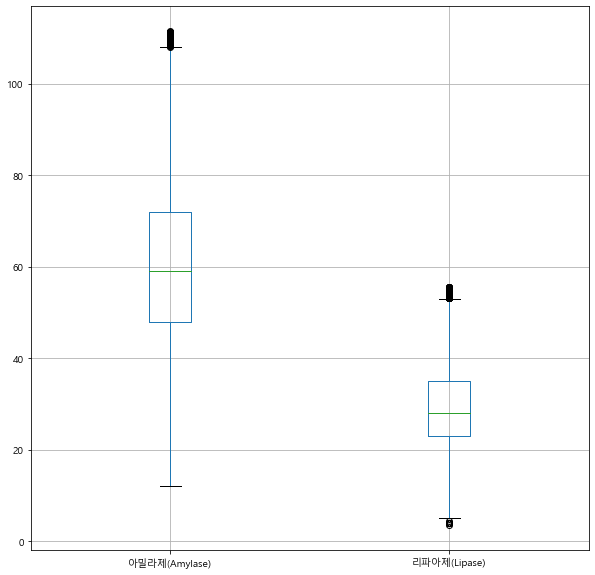

In [629]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [630]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN


In [631]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [632]:
len(target_cols)

2

In [633]:
target_cols_direction

[True, True]

In [634]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    # 파생요소 때문에 1을 추가
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols) + 1):(5+len(cols) + 1 + len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [635]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

411.16948 sec


## 검진 항목 별 가중치 

In [636]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean
310636,2010,609272,143,1,40,NaN,NaN,100.00,100.00,100.00
621051,2010,585711,154,1,52,70.0,NaN,72.32,100.00,100.00
522508,2010,593983,156,1,48,66.0,NaN,72.22,100.00,100.00
283637,2010,612330,185,1,39,77.0,37.0,48.40,51.28,51.28
25249,2010,645901,212,1,28,46.0,26.0,127.16,93.20,93.20


In [637]:
target_cols_kde

['아밀라제(Amylase)_kde', '리파아제(Lipase)_kde']

In [638]:
target_cols_ratio

[3, 3]

In [639]:
sum(target_cols_ratio)

6

In [640]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182553 entries, 310636 to 173271
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   검진년도               1182553 non-null  int64  
 1   UID                1182553 non-null  int64  
 2   CU_REC_ID          1182553 non-null  int64  
 3   SEX                1182553 non-null  int64  
 4   검진당시나이             1182553 non-null  int64  
 5   아밀라제(Amylase)      824436 non-null   float64
 6   리파아제(Lipase)       192634 non-null   float64
 7   아밀라제(Amylase)_kde  1182553 non-null  float64
 8   리파아제(Lipase)_kde   1182553 non-null  float64
 9   kde_mean           1182553 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 99.2 MB


In [641]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])    
) / sum(target_cols_ratio)

In [642]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [643]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [644]:
df_target['kde_mean'].min()

3.8

In [645]:
df_target['kde_mean'].max()

198.69

In [646]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean
19,2019,153543,325845,1,20,NaN,NaN,100.00,100.00,100.00
17,2019,152079,325977,1,20,41.0,NaN,159.97,100.00,129.98
42,2019,392728,325980,1,20,43.0,NaN,145.88,100.00,122.94
44,2019,438481,325982,1,20,57.0,NaN,100.43,100.00,100.21
45,2019,439691,326889,1,20,65.0,33.0,73.76,34.46,54.11
18,2019,153352,327360,1,20,61.0,21.0,94.37,82.75,88.56
13,2019,130234,328771,1,20,50.0,46.0,105.56,6.06,55.81
35,2019,339160,328877,1,20,48.0,28.0,111.95,50.03,80.99
8,2019,41096,329045,1,20,NaN,NaN,100.00,100.00,100.00
9,2019,117629,330495,1,20,69.0,NaN,58.26,100.00,79.13


In [647]:
df_target['검진당시나이'].value_counts()

40    52894
38    51112
36    48686
42    47890
39    44273
41    44022
37    43509
34    43072
32    42438
30    41520
44    40987
35    40703
43    38623
46    37554
48    37092
50    36773
33    35256
31    35208
45    33605
49    32988
47    32805
28    32651
51    32261
52    31749
29    30294
53    26041
54    23671
27    22364
26    18994
55    16865
56    14919
57    12356
58    10993
25    10198
59     8595
24     6796
60     6280
23     3232
22     2475
62     1769
61     1749
21     1253
63     1229
64     1164
20     1098
65      804
66      681
67      422
68      416
69      224
Name: 검진당시나이, dtype: int64

In [648]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean
count,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,824436.000000,192634.000000,1.182553e+06,1.182553e+06,1.182553e+06
mean,2.021875e+03,5.082619e+05,1.489340e+06,1.368049e+00,4.072446e+01,61.168872,29.221973,9.443106e+01,9.827874e+01,9.635483e+01
std,1.698403e+00,3.648651e+05,7.931516e+05,4.822751e-01,8.902269e+00,17.628464,9.010604,3.345407e+01,1.609107e+01,1.936105e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,12.000000,3.500000,1.650000e+00,5.300000e-01,3.800000e+00
25%,2.021000e+03,2.212300e+05,6.795210e+05,1.000000e+00,3.400000e+01,48.000000,23.000000,8.477000e+01,1.000000e+02,8.937000e+01
50%,2.022000e+03,3.805050e+05,1.399669e+06,1.000000e+00,4.000000e+01,59.000000,28.000000,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.357460e+05,2.172883e+06,2.000000e+00,4.800000e+01,72.000000,35.000000,1.015400e+02,1.000000e+02,1.010800e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,111.500000,55.500000,1.999600e+02,2.000000e+02,1.986900e+02


<AxesSubplot:>

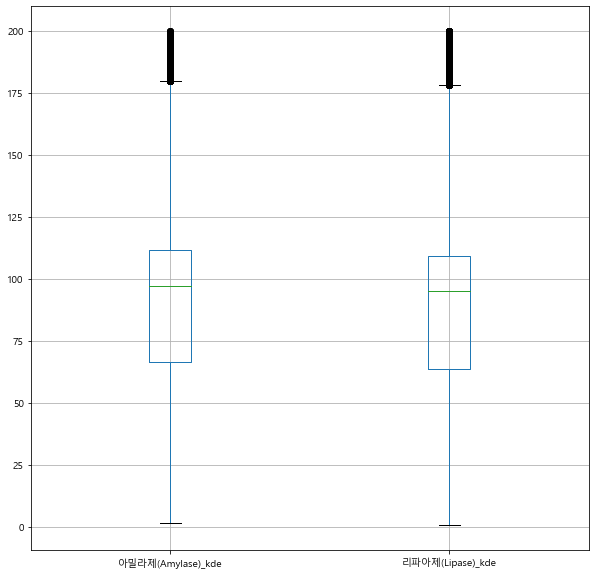

In [649]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

<AxesSubplot:>

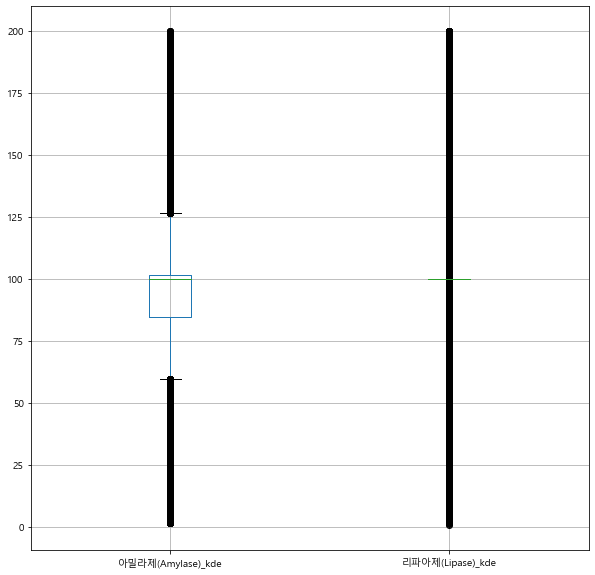

In [650]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

## target Scaling

In [651]:
df_target['kde_mean'].max()

198.69

In [652]:
df_target['kde_mean'].min()

3.8

In [653]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [654]:
df_target['target'] = (df_target['target'] * 100) + 50

In [655]:
df_target['target'] = df_target['target'].round(0)

In [656]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
96,52.0,8
93,53.0,33
88,54.0,83
84,55.0,131
81,56.0,176
79,57.0,236
74,58.0,316
72,59.0,396
69,60.0,443
66,61.0,534


In [657]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
count,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06,824436.000000,192634.000000,1.182553e+06,1.182553e+06,1.182553e+06,1.182553e+06
mean,2.021875e+03,5.082619e+05,1.489340e+06,1.368049e+00,4.072446e+01,61.168872,29.221973,9.443106e+01,9.827874e+01,9.635483e+01,9.817870e+01
std,1.698403e+00,3.648651e+05,7.931516e+05,4.822751e-01,8.902269e+00,17.628464,9.010604,3.345407e+01,1.609107e+01,1.936105e+01,9.683200e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,12.000000,3.500000,1.650000e+00,5.300000e-01,3.800000e+00,5.200000e+01
25%,2.021000e+03,2.212300e+05,6.795210e+05,1.000000e+00,3.400000e+01,48.000000,23.000000,8.477000e+01,1.000000e+02,8.937000e+01,9.500000e+01
50%,2.022000e+03,3.805050e+05,1.399669e+06,1.000000e+00,4.000000e+01,59.000000,28.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.357460e+05,2.172883e+06,2.000000e+00,4.800000e+01,72.000000,35.000000,1.015400e+02,1.000000e+02,1.010800e+02,1.010000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,111.500000,55.500000,1.999600e+02,2.000000e+02,1.986900e+02,1.490000e+02


<AxesSubplot:>

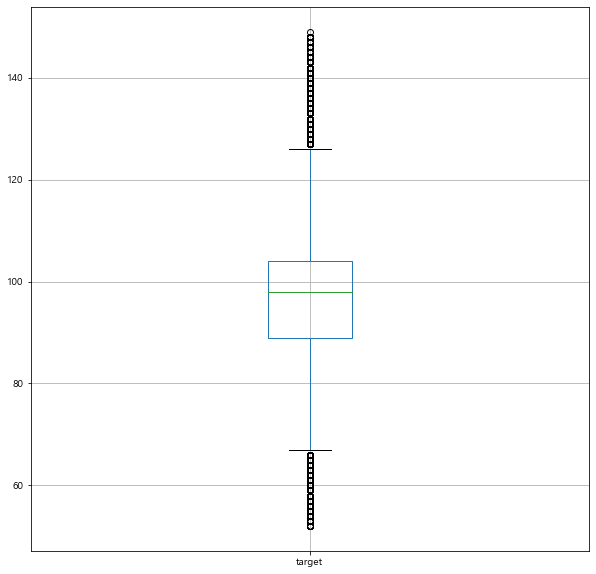

In [658]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

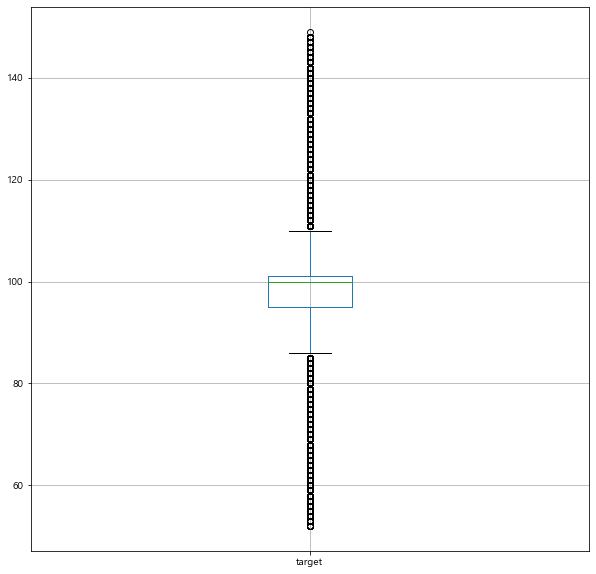

In [659]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

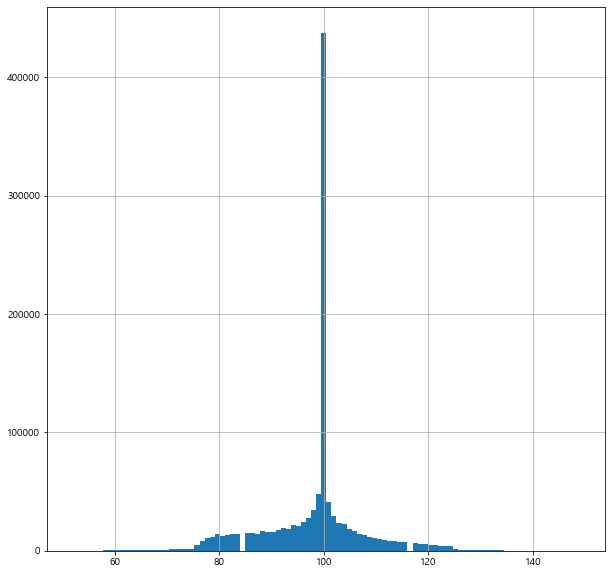

In [660]:
df_boxplot['target'].hist(bins=100)

In [661]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
310636,2010,609272,143,1,40,NaN,NaN,100.00,100.00,100.00,100.0
621051,2010,585711,154,1,52,70.0,NaN,72.32,100.00,86.16,93.0
522508,2010,593983,156,1,48,66.0,NaN,72.22,100.00,86.11,93.0
283637,2010,612330,185,1,39,77.0,37.0,48.40,51.28,49.84,75.0
25249,2010,645901,212,1,28,46.0,26.0,127.16,93.20,110.18,105.0
788501,2010,710490,213,2,28,39.0,24.0,160.82,107.01,133.92,117.0
453333,2010,491012,226,1,45,53.0,32.0,101.41,78.26,89.84,95.0
750699,2010,315847,230,2,23,71.0,41.0,91.45,21.95,56.70,78.0
753018,2010,719072,231,2,24,62.0,32.0,99.78,88.22,94.00,97.0
252922,2010,614169,238,1,38,61.0,46.0,97.52,22.59,60.06,80.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

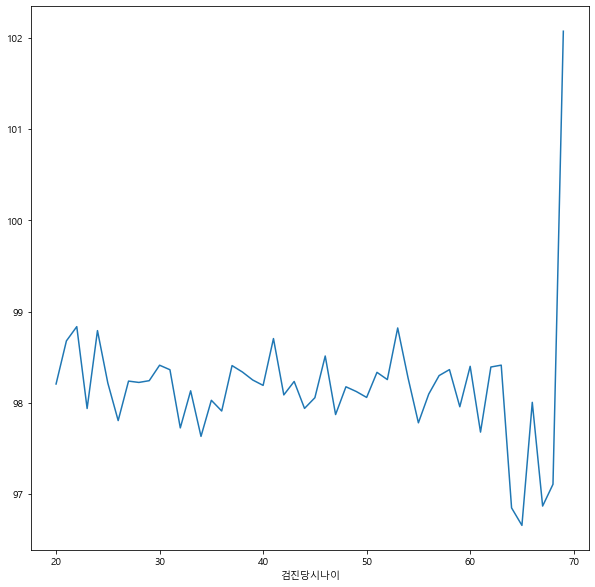

In [662]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

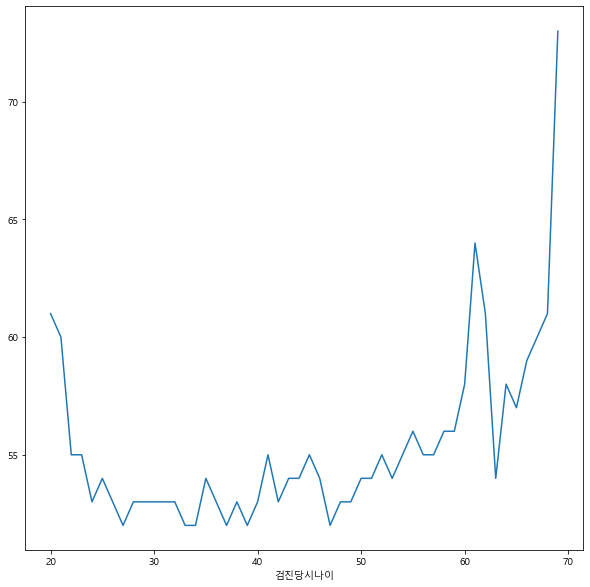

In [663]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

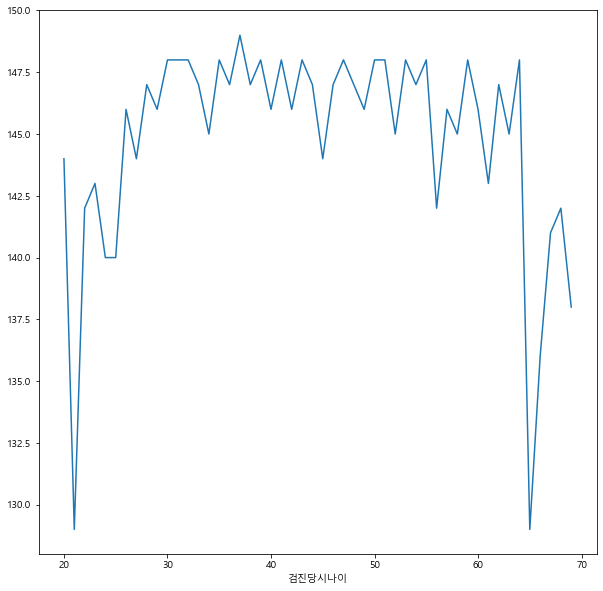

In [664]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [665]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
310636,2010,609272,143,1,40,NaN,NaN,100.00,100.00,100.00,100.0
621051,2010,585711,154,1,52,70.0,NaN,72.32,100.00,86.16,93.0
522508,2010,593983,156,1,48,66.0,NaN,72.22,100.00,86.11,93.0
283637,2010,612330,185,1,39,77.0,37.0,48.40,51.28,49.84,75.0
25249,2010,645901,212,1,28,46.0,26.0,127.16,93.20,110.18,105.0


# 결측행 제거

In [666]:
# df_result.dropna(axis=0).info()

In [667]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [668]:
df_target['SEX'].value_counts()

1    747315
2    435238
Name: SEX, dtype: int64

In [669]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

747315

In [670]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
310636,2010,609272,143,1,40,NaN,NaN,100.00,100.00,100.00,100.0
621051,2010,585711,154,1,52,70.0,NaN,72.32,100.00,86.16,93.0
522508,2010,593983,156,1,48,66.0,NaN,72.22,100.00,86.11,93.0
283637,2010,612330,185,1,39,77.0,37.0,48.40,51.28,49.84,75.0
25249,2010,645901,212,1,28,46.0,26.0,127.16,93.20,110.18,105.0


# 결측치 처리

## 결측치 삭제

In [671]:
# df_man.dropna(inplace=True)

In [672]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
310636,2010,609272,143,1,40,NaN,NaN,100.00,100.00,100.00,100.0
621051,2010,585711,154,1,52,70.0,NaN,72.32,100.00,86.16,93.0
522508,2010,593983,156,1,48,66.0,NaN,72.22,100.00,86.11,93.0
283637,2010,612330,185,1,39,77.0,37.0,48.40,51.28,49.84,75.0
25249,2010,645901,212,1,28,46.0,26.0,127.16,93.20,110.18,105.0


## 결측치 평균으로 대체

In [673]:
# 결측치를 평균으로 대체 하는 함수
# fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [674]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [675]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [676]:
len(df_man)

747315

In [677]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [678]:
len(df_man)

534059

In [679]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
621051,2010,585711,154,1,52,70.0,NaN,72.32,100.00,86.16,93.0
522508,2010,593983,156,1,48,66.0,NaN,72.22,100.00,86.11,93.0
283637,2010,612330,185,1,39,77.0,37.0,48.40,51.28,49.84,75.0
25249,2010,645901,212,1,28,46.0,26.0,127.16,93.20,110.18,105.0
453333,2010,491012,226,1,45,53.0,32.0,101.41,78.26,89.84,95.0


## fillna

In [680]:
df_man.mean().round(2)

검진년도                    2022.04
UID                   527299.66
CU_REC_ID            1519586.87
SEX                        1.00
검진당시나이                    41.77
아밀라제(Amylase)             59.91
리파아제(Lipase)              29.09
아밀라제(Amylase)_kde         92.03
리파아제(Lipase)_kde          97.49
kde_mean                  94.76
target                    97.38
dtype: float64

In [681]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [682]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [683]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [684]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [685]:
len(df_man)

534059

In [686]:
len(df_man)

534059

In [687]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [688]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
645085,2019,50,356493,1,53,21.0,29.09,196.60,100.00,148.30,124.0
686198,2021,50,642497,1,55,34.0,29.09,167.52,100.00,133.76,117.0
311246,2019,62,421626,1,40,50.7,29.09,101.29,100.00,100.64,100.0
345840,2020,62,565527,1,41,50.5,29.09,103.63,100.00,101.82,101.0
377345,2021,62,699357,1,42,60.1,29.09,95.71,100.00,97.86,99.0
409298,2022,62,1356310,1,43,48.0,29.09,114.68,100.00,107.34,104.0
441416,2023,62,2170394,1,44,44.0,29.09,109.06,100.00,104.53,102.0
597442,2019,67,410099,1,51,46.0,29.09,110.81,100.00,105.41,103.0
623303,2020,67,481109,1,52,36.0,29.09,153.27,100.00,126.64,113.0
647911,2021,67,643695,1,53,47.0,29.09,118.43,100.00,109.21,105.0


In [689]:
len(df_man)

534059

In [690]:
df_man[target_cols]

,아밀라제(Amylase),리파아제(Lipase)
645085,21.0,29.09
686198,34.0,29.09
311246,50.7,29.09
345840,50.5,29.09
377345,60.1,29.09
...,...,...
745852,44.0,24.00
745851,44.0,24.00
52866,70.0,19.00
12182,62.0,24.00


## first만 남겨두고 중복 제거

In [691]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [692]:
len(df_man)

459533

In [693]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
645085,2019,50,356493,1,53,21.0,29.09,196.60,100.00,148.30,124.0
686198,2021,50,642497,1,55,34.0,29.09,167.52,100.00,133.76,117.0
311246,2019,62,421626,1,40,50.7,29.09,101.29,100.00,100.64,100.0
345840,2020,62,565527,1,41,50.5,29.09,103.63,100.00,101.82,101.0
377345,2021,62,699357,1,42,60.1,29.09,95.71,100.00,97.86,99.0
409298,2022,62,1356310,1,43,48.0,29.09,114.68,100.00,107.34,104.0
441416,2023,62,2170394,1,44,44.0,29.09,109.06,100.00,104.53,102.0
597442,2019,67,410099,1,51,46.0,29.09,110.81,100.00,105.41,103.0
623303,2020,67,481109,1,52,36.0,29.09,153.27,100.00,126.64,113.0
647911,2021,67,643695,1,53,47.0,29.09,118.43,100.00,109.21,105.0


In [694]:
df_man.reset_index(drop=True, inplace=True)

In [695]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
0,2019,50,356493,1,53,21.0,29.09,196.60,100.0,148.30,124.0
1,2021,50,642497,1,55,34.0,29.09,167.52,100.0,133.76,117.0
2,2019,62,421626,1,40,50.7,29.09,101.29,100.0,100.64,100.0
3,2020,62,565527,1,41,50.5,29.09,103.63,100.0,101.82,101.0
4,2021,62,699357,1,42,60.1,29.09,95.71,100.0,97.86,99.0


In [696]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459533 entries, 0 to 459532
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               459533 non-null  int64  
 1   UID                459533 non-null  int64  
 2   CU_REC_ID          459533 non-null  int64  
 3   SEX                459533 non-null  int64  
 4   검진당시나이             459533 non-null  int64  
 5   아밀라제(Amylase)      459533 non-null  float64
 6   리파아제(Lipase)       459533 non-null  float64
 7   아밀라제(Amylase)_kde  459533 non-null  float64
 8   리파아제(Lipase)_kde   459533 non-null  float64
 9   kde_mean           459533 non-null  float64
 10  target             459533 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 38.6 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

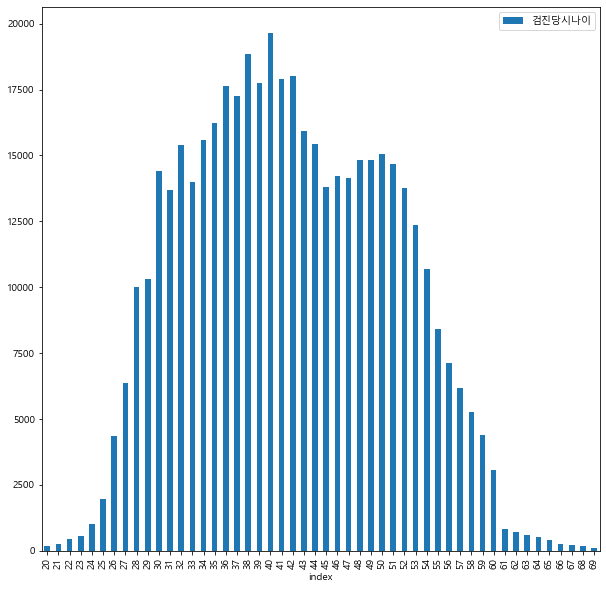

In [697]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [698]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
47,20,179
45,21,257
42,22,430
40,23,546
36,24,1000
35,25,1963
33,26,4346
29,27,6354
26,28,10001
25,29,10315


# 검진항목 시각화

In [699]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
count,459533.000000,4.595330e+05,4.595330e+05,459533.0,459533.000000,459533.000000,459533.000000,459533.000000,459533.000000,459533.000000,459533.000000
mean,2022.000183,5.203143e+05,1.508121e+06,1.0,41.826863,59.884741,29.093148,92.118381,97.546000,94.832023,97.418212
std,1.631437,3.683932e+05,8.200586e+05,0.0,8.810582,17.203760,4.283958,39.609678,18.602814,22.669841,11.335000
min,2010.000000,5.000000e+01,1.540000e+02,1.0,20.000000,12.000000,3.500000,1.650000,0.530000,3.800000,52.000000
25%,2021.000000,2.248210e+05,6.566800e+05,1.0,35.000000,48.000000,29.090000,68.180000,100.000000,80.450000,90.000000
50%,2022.000000,3.886550e+05,1.438939e+06,1.0,41.000000,59.000000,29.090000,98.520000,100.000000,98.230000,99.000000
75%,2023.000000,8.485320e+05,2.253305e+06,1.0,49.000000,70.000000,29.090000,110.190000,100.000000,106.040000,103.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,111.500000,55.500000,199.960000,199.970000,196.540000,148.000000


<AxesSubplot:xlabel='검진당시나이'>

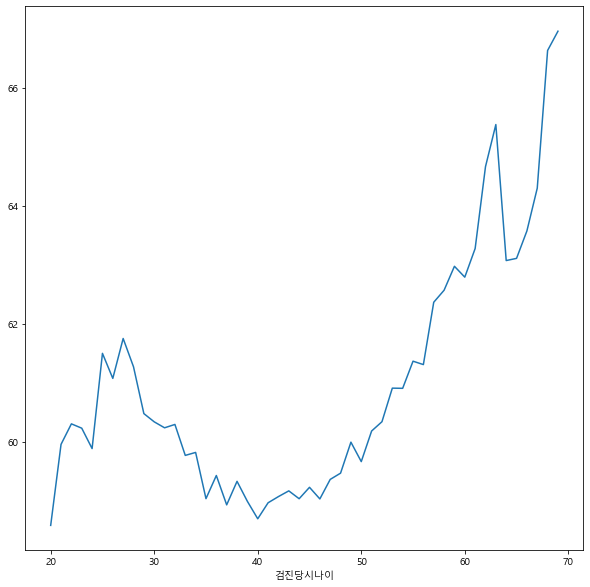

In [700]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

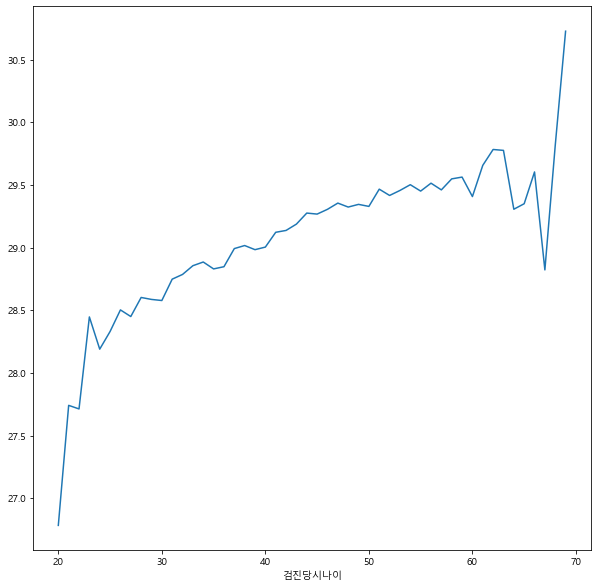

In [701]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

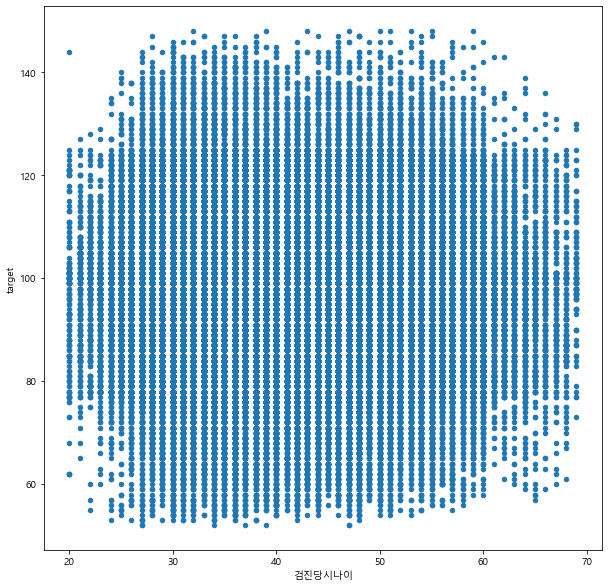

In [702]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

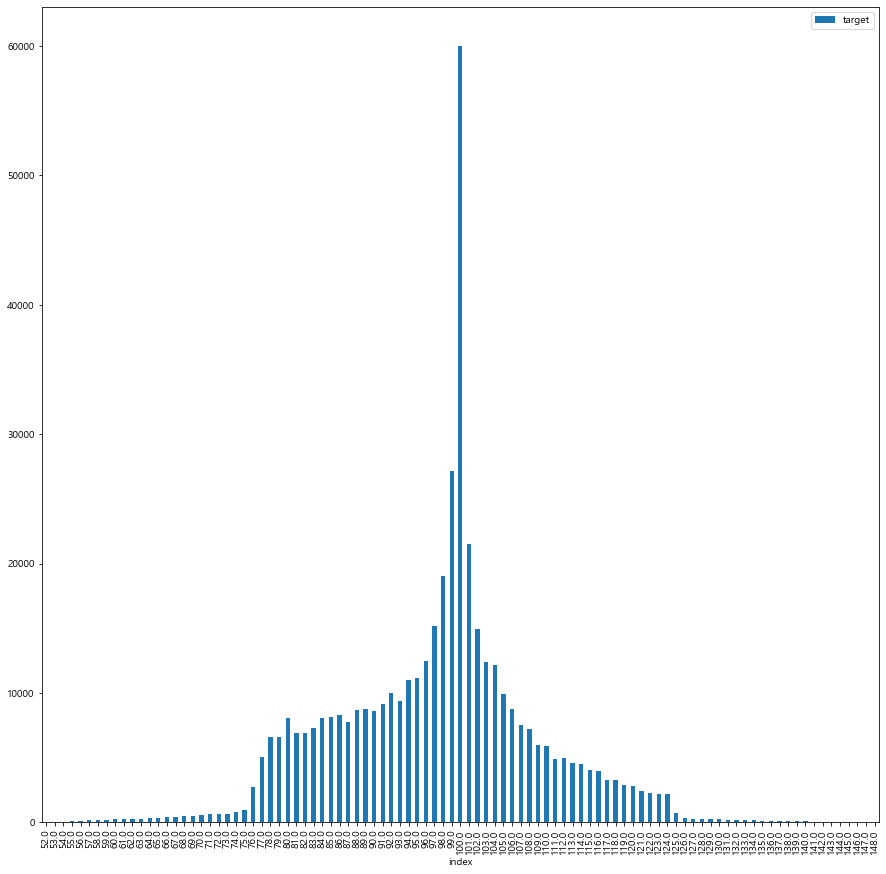

In [703]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [704]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
96,52.0,7
91,53.0,20
87,54.0,49
83,55.0,78
80,56.0,103
76,57.0,147
75,58.0,158
72,59.0,182
69,60.0,229
67,61.0,257


In [705]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [706]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

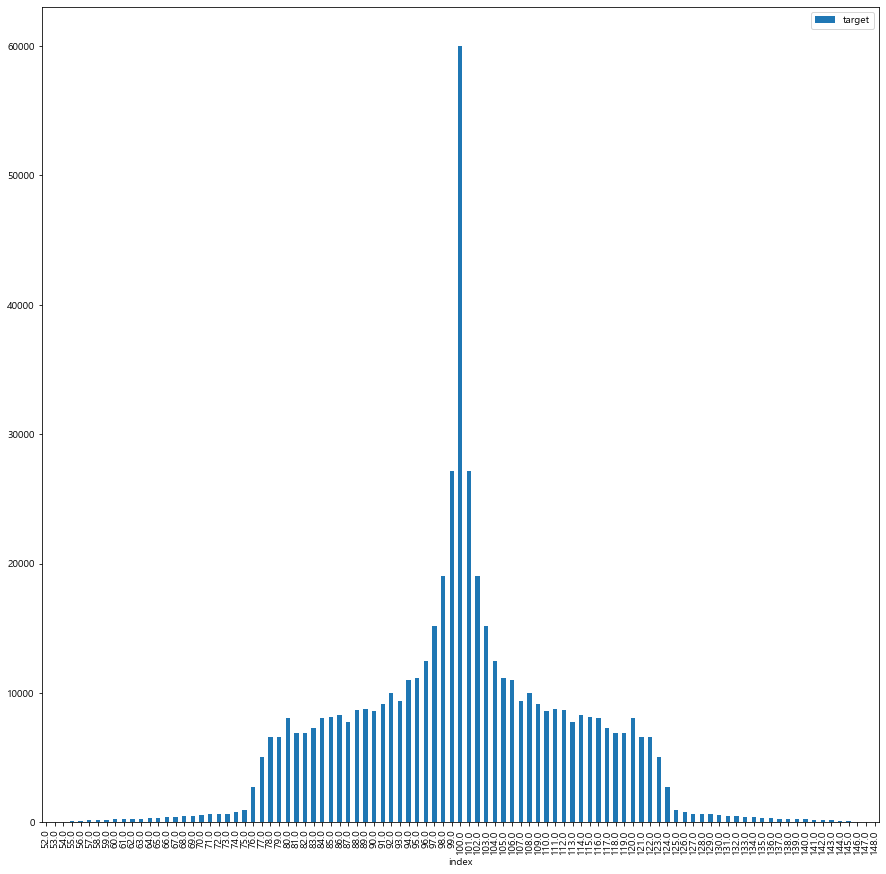

In [707]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [708]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
96,52.0,9
93,53.0,20
91,54.0,49
90,55.0,78
88,56.0,103
86,57.0,147
83,58.0,158
81,59.0,182
80,60.0,229
78,61.0,257


# 나이별 확인하기

In [709]:
# target = 'target'

In [710]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [711]:
# df_man = df_man_sample

In [712]:
# int(df_man['검진당시나이'].value_counts().mean())

In [713]:
# df_man['검진당시나이'].min()

In [714]:
# df_man['검진당시나이'].max()

In [715]:
# df_man.columns

In [716]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [717]:
# df_temp.info()

In [718]:
# df_temp.reset_index(drop=True, inplace=True)

In [719]:
# df_man = df_temp.copy()

In [720]:
# df_man['검진당시나이'].value_counts()

In [721]:
# df_man[df_man['검진당시나이']==38]

In [722]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [723]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '아밀라제(Amylase)',
       '리파아제(Lipase)', '아밀라제(Amylase)_kde', '리파아제(Lipase)_kde', 'kde_mean',
       'target'],
      dtype='object')

In [724]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [725]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [726]:
train_columns = target_cols.copy()

In [727]:
train_columns.insert(0, '검진당시나이')

In [728]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [729]:
train_columns

['검진당시나이', '아밀라제(Amylase)', '리파아제(Lipase)']

In [730]:
target_col = 'target'

## Min Max Scaling

In [731]:
from sklearn.preprocessing import MinMaxScaler

In [732]:
scaling_bool

False

In [743]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [744]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [745]:
# model = LinearRegression()

In [746]:
# model.fit(X_train, y_train)

In [747]:
# model.intercept_

In [748]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [749]:
model = XGBRegressor()

In [750]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [751]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [752]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 1871.37 seconds for 10 candidates parameter settings.


In [753]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [754]:
# best score
random_search.best_score_

-0.055900984445484504

In [755]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [756]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [757]:
# model = build_model()

In [758]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [759]:
# model.summary()

In [760]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [761]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [762]:
# plot_history(history)

## pyTorch 신경망

In [763]:
np.shape(X_train)[1]

3

In [764]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [765]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [766]:
# epochs = 1000

In [767]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [768]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [769]:
# plt.plot(losses)

## coef 계산

In [770]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [771]:
# df_coef.columns = ['검사항목', 'coef']

In [772]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [773]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [774]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [775]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [776]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [777]:
# slr = LinearRegression()

In [778]:
# slr.fit(X_train_poly, y_train)

In [779]:
# np.shape(X_train)

In [780]:
# np.shape(X_train_poly)

In [781]:
# np.shape(X_test)

In [782]:
# np.shape(X_test_poly)

In [783]:
# y_pred_poly = slr.predict(X_test_poly)

In [784]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [785]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [786]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [787]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [788]:
pyTorch_bool

False

In [789]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [790]:
XGB_bool

True

In [791]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [792]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.14309028415446176
MSE : 0.05263112073818263
RMSE : 0.22941473522462028


In [793]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9996625772632894

In [794]:
model.score(X_test, y_test)

0.9996625772632894

## feature importance

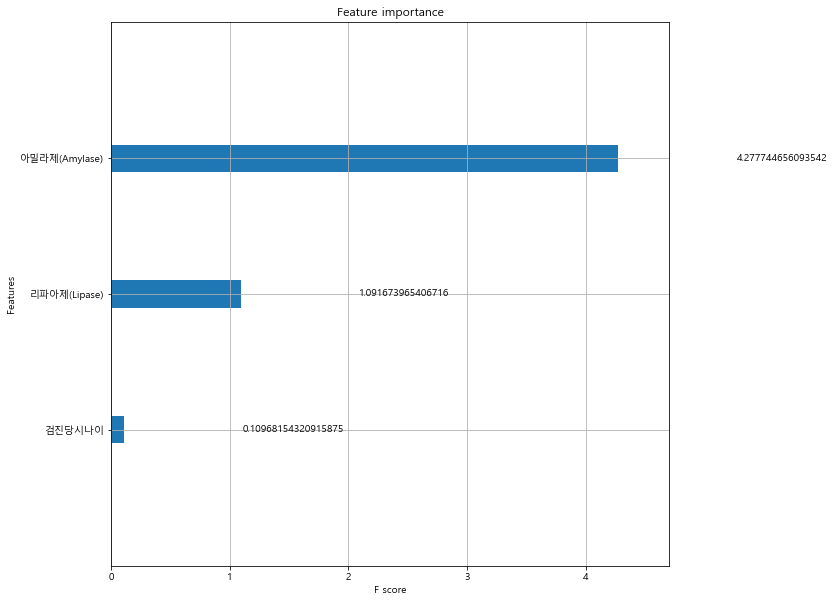

In [795]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [796]:
model.feature_importances_

array([0.02001817, 0.78073853, 0.19924329], dtype=float32)

In [797]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [798]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,아밀라제(Amylase),0.780739
2,리파아제(Lipase),0.199243
0,검진당시나이,0.020018


# 실제지수 - 예측지수 결과

In [799]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,109.0
1,122.0
2,100.0
3,123.0
4,100.0
...,...
135771,81.0
135772,123.0
135773,112.0
135774,109.0


In [800]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,108.850594
1,122.068062
2,100.062157
3,122.804848
4,99.943039
...,...
135771,80.873611
135772,123.262917
135773,111.989517
135774,108.969101


In [801]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [802]:
df_test.head()

,target,0
0,109.0,108.850594
1,122.0,122.068062
2,100.0,100.062157
3,123.0,122.804848
4,100.0,99.943039


In [803]:
df_test.columns

Index(['target', 0], dtype='object')

In [804]:
df_test.columns = ['실제지수', '예측지수']

In [805]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [806]:
df_test.head()

,실제지수,예측지수,diff
0,109.0,108.850594,-0.149406
1,122.0,122.068062,0.068062
2,100.0,100.062157,0.062157
3,123.0,122.804848,-0.195152
4,100.0,99.943039,-0.056961


In [807]:
df_test['diff_int'] = df_test['diff'].round(0)

In [808]:
len(df_test)

135776

In [809]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,109.0,108.850594,-0.149406,-0.0
1,122.0,122.068062,0.068062,0.0
2,100.0,100.062157,0.062157,0.0
3,123.0,122.804848,-0.195152,-0.0
4,100.0,99.943039,-0.056961,-0.0


<AxesSubplot:>

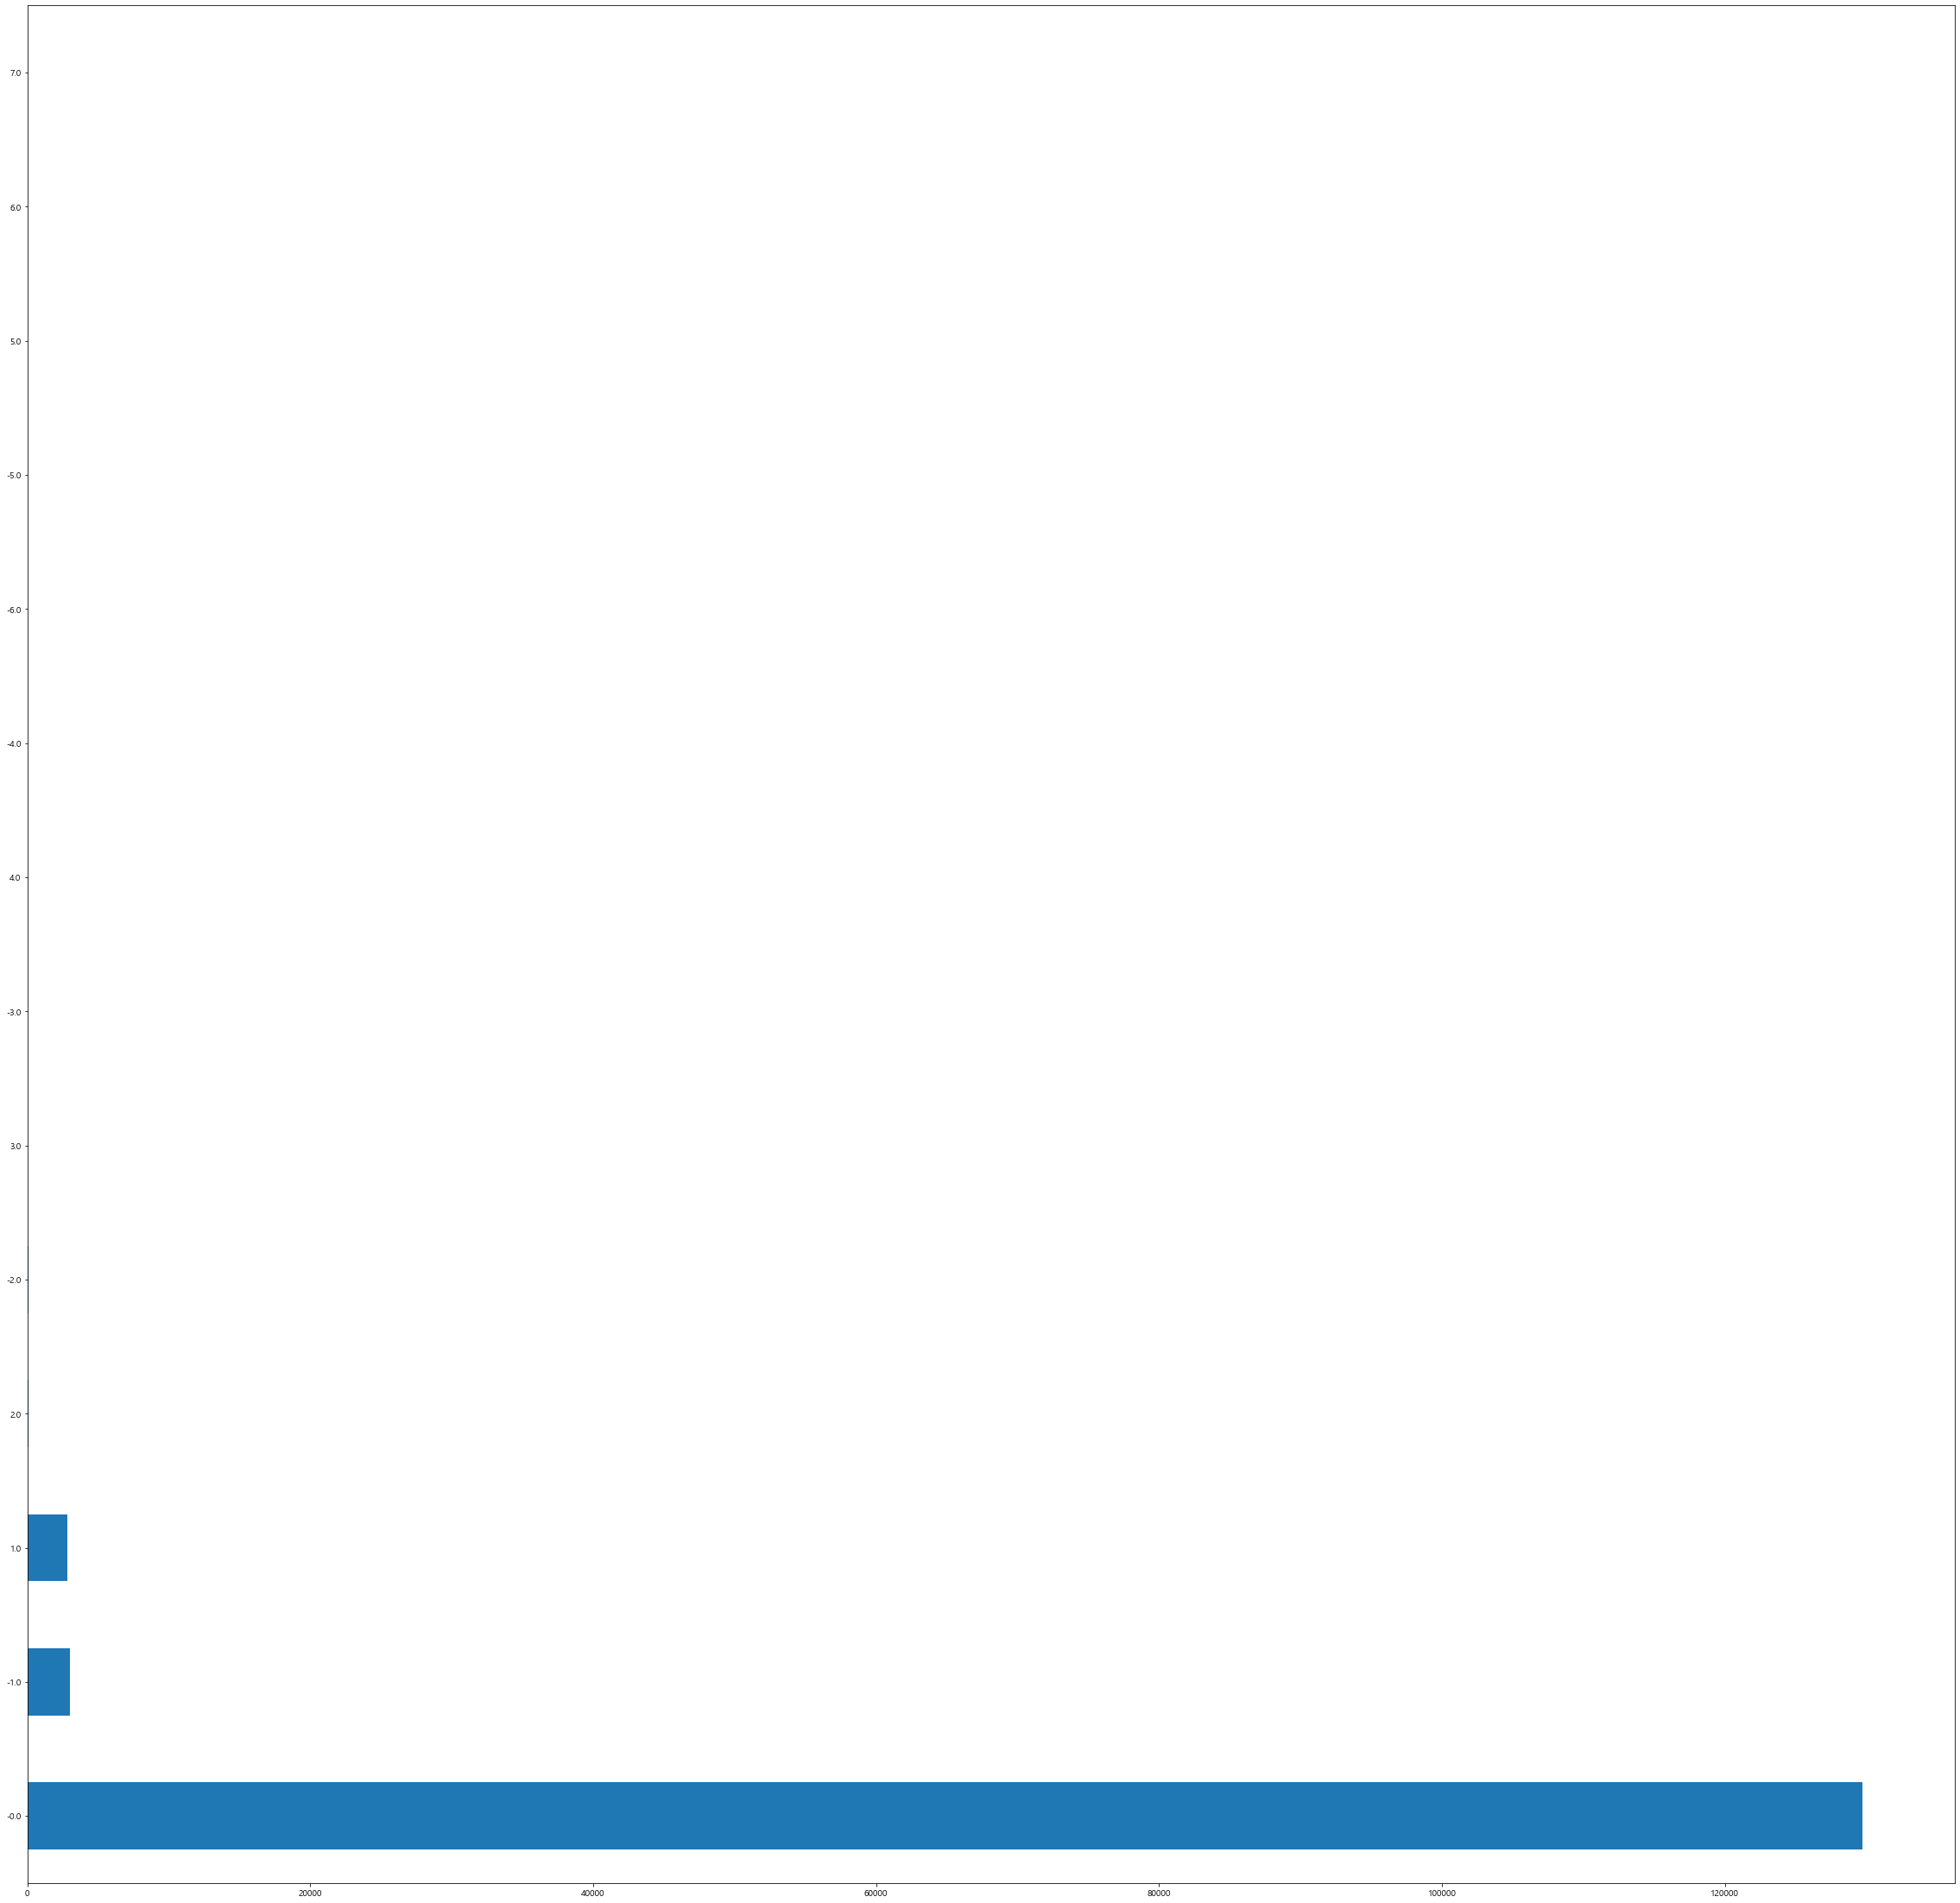

In [810]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [811]:
df_test['diff_int'].value_counts(ascending=False)

-0.0    129753
-1.0      3019
 1.0      2850
 2.0        62
-2.0        57
 3.0        14
-3.0         8
 4.0         3
-4.0         3
-6.0         2
-5.0         2
 5.0         1
 6.0         1
 7.0         1
Name: diff_int, dtype: int64

In [812]:
df_test['예측지수'].round(0).value_counts()

100.0    15015
101.0     6801
99.0      6739
102.0     4856
98.0      4784
97.0      3843
103.0     3830
104.0     3199
96.0      3055
95.0      2819
105.0     2769
94.0      2742
106.0     2647
92.0      2474
108.0     2414
93.0      2376
107.0     2350
91.0      2319
109.0     2305
112.0     2163
90.0      2152
88.0      2147
110.0     2143
111.0     2131
89.0      2113
114.0     2104
116.0     2102
80.0      2060
115.0     2059
84.0      2029
86.0      2024
120.0     2000
87.0      1977
113.0     1915
85.0      1896
117.0     1798
83.0      1794
118.0     1769
119.0     1746
81.0      1704
122.0     1704
82.0      1686
121.0     1675
78.0      1666
79.0      1641
77.0      1314
123.0     1266
76.0       702
124.0      693
125.0      267
75.0       201
74.0       193
126.0      176
73.0       175
127.0      171
71.0       164
130.0      156
72.0       151
69.0       149
70.0       147
131.0      139
128.0      137
129.0      135
132.0      134
68.0       125
134.0      123
67.0      

# 예측 나이 분포

In [813]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [814]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [815]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [816]:
df_plot = pd.DataFrame(y_test.value_counts())

In [817]:
df_plot.columns = ['count']

In [818]:
df_plot.reset_index(inplace=True)

In [819]:
df_plot = df_plot.sort_values('index', ascending=True)

In [820]:
df_plot

,index,count
96,52.0,1
94,53.0,6
92,54.0,11
88,55.0,26
89,56.0,22
87,57.0,31
82,58.0,39
84,59.0,35
80,60.0,52
75,61.0,68


In [821]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

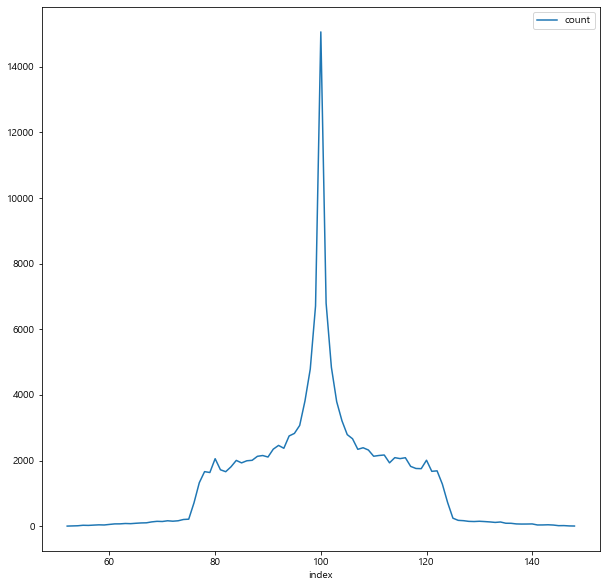

In [822]:
df_plot.plot()

In [823]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [824]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [825]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [826]:
df_plot.columns = ['count']

In [827]:
df_plot.reset_index(inplace=True)

In [828]:
df_plot = df_plot.sort_values(0, ascending=True)

In [829]:
df_plot.set_index(0, inplace=True)

In [830]:
df_plot

,count
0,
52.0,2
53.0,8
54.0,9
55.0,18
56.0,28
57.0,32
58.0,38
59.0,36
60.0,51


<AxesSubplot:xlabel='0'>

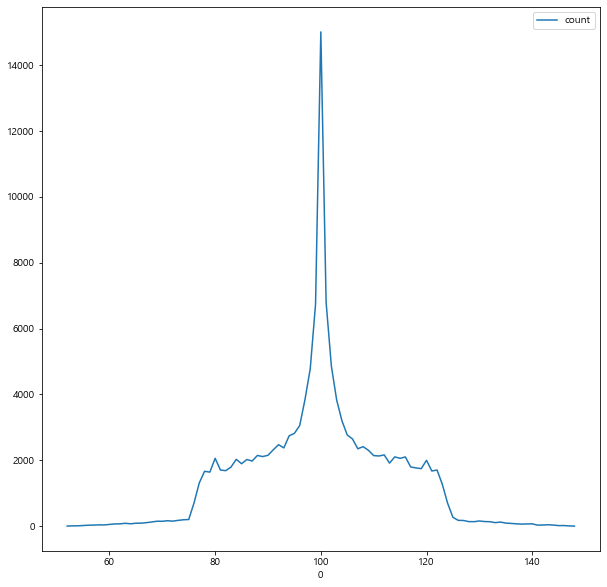

In [831]:
df_plot.plot()

# 시각화

In [832]:
# model.coef_

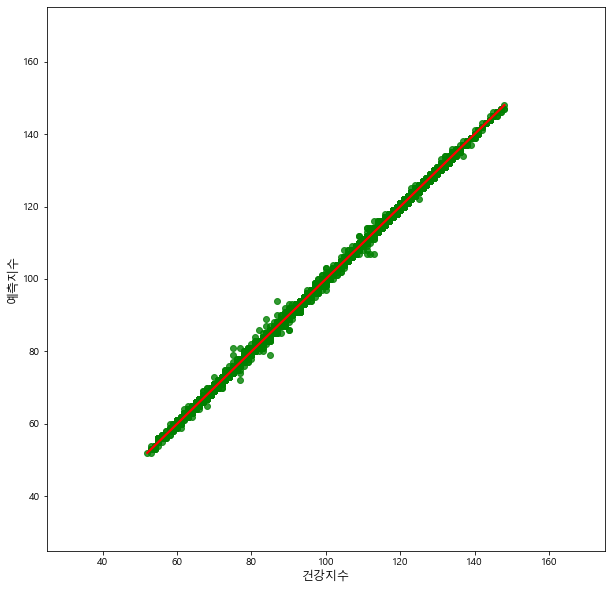

In [833]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [834]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
0,2019,50,356493,1,53,21.0,29.09,196.60,100.0,148.30,124.0
1,2021,50,642497,1,55,34.0,29.09,167.52,100.0,133.76,117.0
2,2019,62,421626,1,40,50.7,29.09,101.29,100.0,100.64,100.0
3,2020,62,565527,1,41,50.5,29.09,103.63,100.0,101.82,101.0
4,2021,62,699357,1,42,60.1,29.09,95.71,100.0,97.86,99.0


In [835]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459533 entries, 0 to 459532
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               459533 non-null  int64  
 1   UID                459533 non-null  int64  
 2   CU_REC_ID          459533 non-null  int64  
 3   SEX                459533 non-null  int64  
 4   검진당시나이             459533 non-null  int64  
 5   아밀라제(Amylase)      459533 non-null  float64
 6   리파아제(Lipase)       459533 non-null  float64
 7   아밀라제(Amylase)_kde  459533 non-null  float64
 8   리파아제(Lipase)_kde   459533 non-null  float64
 9   kde_mean           459533 non-null  float64
 10  target             459533 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 38.6 MB


In [836]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
69806,2022,168996,2259500,1,35,60.0,25.0,91.27,99.21,95.24,98.0
69807,2023,168996,2259499,1,36,64.0,24.0,76.77,97.63,87.20,94.0
69808,2024,168996,2281994,1,37,51.0,22.0,100.00,101.93,100.96,100.0


In [837]:
train_columns

['검진당시나이', '아밀라제(Amylase)', '리파아제(Lipase)']

In [838]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [839]:
len(df_pred)

459533

In [840]:
df_pred.reset_index(drop=True, inplace=True)

In [841]:
X_test

,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
363458,37,48.00,18.00
290402,51,26.00,29.09
15016,26,59.91,19.60
93215,42,24.00,29.09
350646,58,57.00,29.09
...,...,...,...
180431,42,89.00,29.09
2415,40,22.00,29.09
149580,46,37.00,29.09
304924,65,65.00,17.00


In [842]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '아밀라제(Amylase)',
       '리파아제(Lipase)', '아밀라제(Amylase)_kde', '리파아제(Lipase)_kde', 'kde_mean',
       'target'],
      dtype='object')

In [843]:
df_pred[train_columns]

,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,53,21.0,29.09
1,55,34.0,29.09
2,40,50.7,29.09
3,41,50.5,29.09
4,42,60.1,29.09
...,...,...,...
459528,36,54.0,19.00
459529,65,44.0,24.00
459530,29,70.0,19.00
459531,26,62.0,24.00


In [844]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [845]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [846]:
pred_data = pred_data.round(0)

In [847]:
pred_data

array([124., 117., 100., ...,  96.,  95., 112.], dtype=float32)

In [848]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [849]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [850]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target,예측지수
0,2019,50,356493,1,53,21.0,29.09,196.60,100.00,148.30,124.0,124.0
1,2021,50,642497,1,55,34.0,29.09,167.52,100.00,133.76,117.0,117.0
2,2019,62,421626,1,40,50.7,29.09,101.29,100.00,100.64,100.0,100.0
3,2020,62,565527,1,41,50.5,29.09,103.63,100.00,101.82,101.0,101.0
4,2021,62,699357,1,42,60.1,29.09,95.71,100.00,97.86,99.0,99.0
5,2022,62,1356310,1,43,48.0,29.09,114.68,100.00,107.34,104.0,104.0
6,2023,62,2170394,1,44,44.0,29.09,109.06,100.00,104.53,102.0,102.0
7,2019,67,410099,1,51,46.0,29.09,110.81,100.00,105.41,103.0,103.0
8,2020,67,481109,1,52,36.0,29.09,153.27,100.00,126.64,113.0,113.0
9,2021,67,643695,1,53,47.0,29.09,118.43,100.00,109.21,105.0,105.0


## 예측지수 성능평가

In [851]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.04457133655254356

# target으로 나이 계산

In [852]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [853]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target,예측지수,예측나이
0,2019,50,356493,1,53,21.0,29.09,196.60,100.00,148.30,124.0,124.0,48.2
1,2021,50,642497,1,55,34.0,29.09,167.52,100.00,133.76,117.0,117.0,51.6
2,2019,62,421626,1,40,50.7,29.09,101.29,100.00,100.64,100.0,100.0,40.0
3,2020,62,565527,1,41,50.5,29.09,103.63,100.00,101.82,101.0,101.0,40.8
4,2021,62,699357,1,42,60.1,29.09,95.71,100.00,97.86,99.0,99.0,42.2
5,2022,62,1356310,1,43,48.0,29.09,114.68,100.00,107.34,104.0,104.0,42.2
6,2023,62,2170394,1,44,44.0,29.09,109.06,100.00,104.53,102.0,102.0,43.6
7,2019,67,410099,1,51,46.0,29.09,110.81,100.00,105.41,103.0,103.0,50.4
8,2020,67,481109,1,52,36.0,29.09,153.27,100.00,126.64,113.0,113.0,49.4
9,2021,67,643695,1,53,47.0,29.09,118.43,100.00,109.21,105.0,105.0,52.0


## 예측나이 성능평가

In [854]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.6975133450698867

# 최종 산출

In [855]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target,예측지수,예측나이
0,2019,50,356493,1,53,21.0,29.09,196.60,100.0,148.30,124.0,124.0,48.2
1,2021,50,642497,1,55,34.0,29.09,167.52,100.0,133.76,117.0,117.0,51.6
2,2019,62,421626,1,40,50.7,29.09,101.29,100.0,100.64,100.0,100.0,40.0
3,2020,62,565527,1,41,50.5,29.09,103.63,100.0,101.82,101.0,101.0,40.8
4,2021,62,699357,1,42,60.1,29.09,95.71,100.0,97.86,99.0,99.0,42.2


# DataMart csv

In [975]:
df_copy = df.copy()

In [976]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN


In [977]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   아밀라제(Amylase)  853333 non-null   float64
 6   리파아제(Lipase)   205287 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 64.8 MB


In [978]:
minimums

[11.5, 3.5]

In [979]:
maximums

[111.5, 55.5]

In [980]:
train_columns

['검진당시나이', '아밀라제(Amylase)', '리파아제(Lipase)']

In [981]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [982]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [983]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [984]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN


## 스크리닝

### 아밀라제 스크리닝

In [985]:
screening = 100

In [986]:
scr_col = '아밀라제(Amylase)'

In [987]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN
5,2010,8634,4751,1,43,60.0,NaN


In [988]:
len(df_man_csv[df_man_csv[scr_col] < screening])

509003

In [989]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [990]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN
5,2010,8634,4751,1,43,60.0,NaN


In [991]:
len(df_man_csv[df_man_csv[scr_col] < screening])

509003

### 리파아제 스크리닝

In [992]:
screening = 60

In [993]:
scr_col = '리파아제(Lipase)'

In [994]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
15,2010,33312,1799,1,41,109.0,55.5
25,2011,281202,6653,1,51,70.0,35.0
32,2010,109464,257,1,40,70.0,29.0
41,2010,117320,4034,1,37,44.0,15.0
55,2010,127320,2694,1,32,50.0,10.0


In [995]:
len(df_man_csv[df_man_csv[scr_col] < screening])

127963

In [996]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [997]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
15,2010,33312,1799,1,41,109.0,55.5
25,2011,281202,6653,1,51,70.0,35.0
32,2010,109464,257,1,40,70.0,29.0
41,2010,117320,4034,1,37,44.0,15.0
55,2010,127320,2694,1,32,50.0,10.0


In [998]:
len(df_man_csv[df_man_csv[scr_col] < screening])

127963

## 검진 항목 all 결측치 지우기

In [999]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [1000]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [1001]:
df_man_csv.reset_index(drop=True, inplace=True)

In [1002]:
len(df_man_csv)

552203

## fillna

In [1003]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 모델 예측

In [1004]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [1005]:
pred_data = pred_data.round(0)

In [1006]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1007]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수
0,2010,7490,3638,1,39,71.0,29.09,92.0
1,2010,7915,3997,1,36,55.0,29.09,100.0
2,2010,8056,4745,1,42,32.0,29.09,117.0
3,2010,8457,3929,1,38,47.0,29.09,101.0
4,2010,8634,4751,1,43,60.0,29.09,99.0


### 성능 평가

In [1008]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [1009]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [1010]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [1011]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.8255275686658716


In [1012]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9193122754736052

In [1013]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
0,2010,7490,3638,1,39,71.0,29.09,92.0,40.6
1,2010,7915,3997,1,36,55.0,29.09,100.0,36.0
2,2010,8056,4745,1,42,32.0,29.09,117.0,38.6
3,2010,8457,3929,1,38,47.0,29.09,101.0,37.8
4,2010,8634,4751,1,43,60.0,29.09,99.0,43.2


In [1014]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552203 entries, 0 to 552202
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           552203 non-null  int64  
 1   UID            552203 non-null  int64  
 2   CU_REC_ID      552203 non-null  int64  
 3   SEX            552203 non-null  int64  
 4   검진당시나이         552203 non-null  int64  
 5   아밀라제(Amylase)  552203 non-null  float64
 6   리파아제(Lipase)   552203 non-null  float64
 7   예측지수           552203 non-null  float32
 8   예측나이           552203 non-null  float64
dtypes: float32(1), float64(3), int64(5)
memory usage: 35.8 MB


# 최종 UID별 확인

In [1015]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
192533,2022,175673,751348,1,48,42.0,28.0,109.0,46.2
192534,2022,175673,1463838,1,48,42.0,28.0,109.0,46.2
192477,2022,175673,1919125,1,48,42.0,28.0,109.0,46.2
192535,2022,175673,2169120,1,48,42.0,28.0,109.0,46.2
192478,2022,175673,2223795,1,48,42.0,28.0,109.0,46.2
192479,2022,175673,2237465,1,48,42.0,28.0,109.0,46.2
192536,2022,175673,2238320,1,48,42.0,28.0,109.0,46.2
192537,2022,175673,2246042,1,48,42.0,28.0,109.0,46.2
309762,2023,175673,1463893,1,49,51.0,31.0,98.0,49.4
309758,2023,175673,1919126,1,49,51.0,31.0,98.0,49.4


In [1016]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
137930,2021,289587,796178,1,47,67.0,23.0,94.0,48.2
214005,2022,289587,866076,1,48,68.0,22.0,96.0,48.8
213971,2022,289587,2115999,1,48,68.0,22.0,96.0,48.8
67184,2022,289587,2603574,1,48,68.0,22.0,96.0,48.8
350862,2023,289587,1487447,1,49,59.0,23.0,101.0,48.8
350863,2023,289587,2227964,1,49,59.0,23.0,101.0,48.8
498912,2024,289587,2243723,1,50,66.0,26.0,96.0,50.8
498896,2024,289587,2603575,1,50,66.0,26.0,96.0,50.8


In [1017]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
285867,2022,897603,1066133,1,51,69.0,26.0,94.0,52.2
285878,2022,897603,1068885,1,51,69.0,26.0,94.0,52.2
285879,2022,897603,1728532,1,51,69.0,26.0,94.0,52.2
285880,2022,897603,2555144,1,51,69.0,26.0,94.0,52.2
424956,2023,897603,1458387,1,52,71.0,30.0,90.0,54.0
424957,2023,897603,1728531,1,52,71.0,30.0,90.0,54.0
415384,2023,897603,2120063,1,52,71.0,30.0,90.0,54.0
415385,2023,897603,2351665,1,52,71.0,30.0,90.0,54.0
424958,2023,897603,2555143,1,52,71.0,30.0,90.0,54.0
415386,2023,897603,2622260,1,52,71.0,30.0,90.0,54.0


In [1018]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
181666,2022,119172,751336,1,41,65.0,20.0,101.0,40.8
181667,2022,119172,1432355,1,41,65.0,20.0,101.0,40.8
181664,2022,119172,1432476,1,41,65.0,20.0,101.0,40.8
181668,2022,119172,2247083,1,41,65.0,20.0,101.0,40.8
181669,2022,119172,2252956,1,41,65.0,20.0,101.0,40.8
298663,2023,119172,1436742,1,42,79.0,20.0,93.0,43.4
298664,2023,119172,2247082,1,42,79.0,20.0,93.0,43.4
298665,2023,119172,2252955,1,42,79.0,20.0,93.0,43.4
484154,2024,119172,2250063,1,43,79.0,22.0,90.0,45.0
484155,2024,119172,2252954,1,43,79.0,22.0,90.0,45.0


In [1019]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
424951,2023,897595,1525045,1,40,54.0,21.0,102.0,39.6
424952,2023,897595,1593851,1,40,54.0,21.0,102.0,39.6
424949,2023,897595,2005289,1,40,54.0,21.0,102.0,39.6
424950,2023,897595,2138998,1,40,54.0,21.0,102.0,39.6
411626,2023,897595,2320478,1,40,54.0,21.0,102.0,39.6
424953,2023,897595,2328772,1,40,54.0,21.0,102.0,39.6
533272,2024,897595,2329051,1,41,48.0,20.0,105.0,40.0


In [1020]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
246950,2022,492764,909688,1,39,65.0,22.0,99.0,39.2
246951,2022,492764,1575802,1,39,65.0,22.0,99.0,39.2
246954,2022,492764,1668547,1,39,65.0,22.0,99.0,39.2
246952,2022,492764,2246777,1,39,65.0,22.0,99.0,39.2
246953,2022,492764,2330256,1,39,65.0,22.0,99.0,39.2
101548,2022,492764,2343199,1,39,65.0,22.0,99.0,39.2
114975,2022,492764,2363393,1,39,65.0,22.0,99.0,39.2
114976,2022,492764,2639564,1,39,65.0,22.0,99.0,39.2
114977,2022,492764,2703924,1,39,65.0,22.0,99.0,39.2
246955,2022,492764,2783328,1,39,65.0,22.0,99.0,39.2


In [1021]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
428549,2023,933936,1431742,1,40,33.0,18.0,124.0,35.2
428550,2023,933936,1435266,1,40,33.0,18.0,124.0,35.2
534427,2024,933936,2242997,1,41,35.0,19.0,120.0,37.0


In [1022]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
190829,2022,168996,919754,1,35,60.0,25.0,98.0,35.4
190830,2022,168996,1425925,1,35,60.0,25.0,98.0,35.4
190831,2022,168996,2259500,1,35,60.0,25.0,98.0,35.4
307983,2023,168996,1425970,1,36,64.0,24.0,94.0,37.2
307984,2023,168996,1475832,1,36,64.0,24.0,94.0,37.2
307985,2023,168996,2259499,1,36,64.0,24.0,94.0,37.2
488367,2024,168996,2281994,1,37,51.0,22.0,100.0,37.0


# 여성 모델

In [1023]:
df_target['SEX'].value_counts()

1    747315
2    435238
Name: SEX, dtype: int64

In [1024]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

435238

# 결측치 처리

## 결측치 삭제

In [1025]:
# df_woman.dropna(inplace=True)

In [1026]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
788501,2010,710490,213,2,28,39.0,24.0,160.82,107.01,133.92,117.0
750699,2010,315847,230,2,23,71.0,41.0,91.45,21.95,56.70,78.0
753018,2010,719072,231,2,24,62.0,32.0,99.78,88.22,94.00,97.0
1011703,2010,552037,332,2,41,NaN,NaN,100.00,100.00,100.00,100.0
851006,2010,232950,983,2,32,NaN,NaN,100.00,100.00,100.00,100.0


## 결측치 평균으로 대체

In [1027]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [1028]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [1029]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [1030]:
len(df_woman)

435238

In [1031]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [1032]:
len(df_woman)

316346

In [1033]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
788501,2010,710490,213,2,28,39.0,24.0,160.82,107.01,133.92,117.0
750699,2010,315847,230,2,23,71.0,41.0,91.45,21.95,56.70,78.0
753018,2010,719072,231,2,24,62.0,32.0,99.78,88.22,94.00,97.0
851012,2010,703063,1116,2,32,80.0,NaN,55.75,100.00,77.88,89.0
776685,2010,713853,1218,2,27,72.0,24.0,77.82,103.87,90.84,95.0


In [1034]:
len(df_woman)

316346

## fillna

In [1035]:
df_woman.mean().round(2)

검진년도                    2021.97
UID                   497460.84
CU_REC_ID            1489639.78
SEX                        2.00
검진당시나이                    38.45
아밀라제(Amylase)             63.29
리파아제(Lipase)              29.43
아밀라제(Amylase)_kde         92.64
리파아제(Lipase)_kde          97.80
kde_mean                  95.22
target                    97.61
dtype: float64

In [1036]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [1037]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [1038]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [1039]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [1040]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
788501,2010,710490,213,2,28,39.0,24.00,160.82,107.01,133.92,117.0
750699,2010,315847,230,2,23,71.0,41.00,91.45,21.95,56.70,78.0
753018,2010,719072,231,2,24,62.0,32.00,99.78,88.22,94.00,97.0
851012,2010,703063,1116,2,32,80.0,29.43,55.75,100.00,77.88,89.0
776685,2010,713853,1218,2,27,72.0,24.00,77.82,103.87,90.84,95.0


# 스크리닝

## 스크리닝

In [1041]:
# screening = 80

In [1042]:
# scr_col = 'ALP'

In [1043]:
# df_woman[df_woman[scr_col] < screening].head()

In [1044]:
# len(df_woman[df_woman[scr_col] < screening])

In [1045]:
# df_woman.loc[df_woman[scr_col] < screening, scr_col] = screening

In [1046]:
# df_woman[df_woman[scr_col] < screening].head()

In [1047]:
# len(df_woman[df_woman[scr_col] < screening])

# 중복 제거

In [1048]:
len(df_woman)

316346

In [1049]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [1050]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
768110,2021,53,2632765,2,26,47.0,13.00,120.52,186.03,153.28,127.0
768109,2021,53,664316,2,26,47.0,13.00,120.52,186.03,153.28,127.0
816478,2024,53,2658222,2,29,50.0,29.43,120.20,100.00,110.10,105.0
820404,2020,54,497669,2,30,39.0,29.43,160.33,100.00,130.16,115.0
857716,2022,54,1319859,2,32,56.0,29.43,99.25,100.00,99.62,100.0
877096,2023,54,2039511,2,33,71.0,29.43,76.34,100.00,88.17,94.0
899233,2024,54,2750990,2,34,41.0,29.43,157.20,100.00,128.60,114.0
874041,2022,56,1351361,2,33,56.0,29.43,101.71,100.00,100.86,100.0
874040,2022,56,1019732,2,33,56.0,29.43,101.71,100.00,100.86,100.0
894232,2023,56,2032999,2,34,54.0,29.43,101.49,100.00,100.74,100.0


## first만 남겨두고 중복 제거

In [1051]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [1052]:
df_woman.reset_index(drop=True, inplace=True)

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

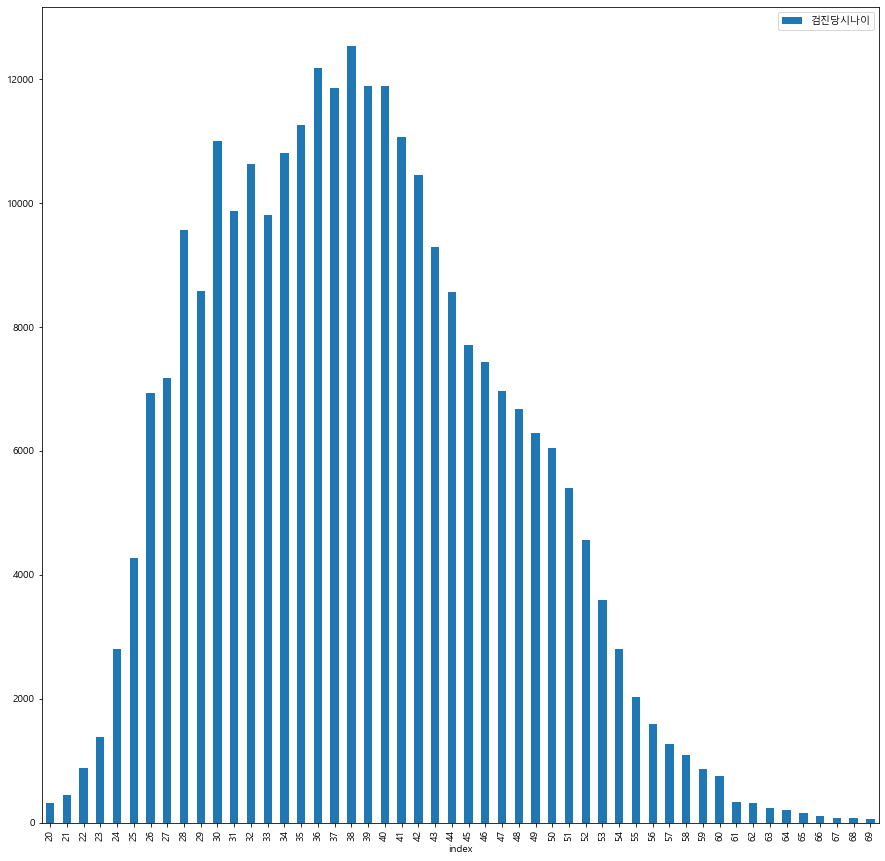

In [1053]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [1054]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
41,20,323
39,21,450
36,22,886
33,23,1374
29,24,2808
27,25,4267
21,26,6942
19,27,7180
13,28,9568
15,29,8581


# 검진항목 시각화

In [1055]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
count,272060.000000,2.720600e+05,2.720600e+05,272060.0,272060.000000,272060.000000,272060.000000,272060.000000,272060.000000,272060.000000,272060.000000
mean,2021.917974,4.902231e+05,1.471559e+06,2.0,38.542175,63.286069,29.431713,92.654689,97.883874,95.269280,97.636073
std,1.576788,3.636924e+05,8.226595e+05,0.0,8.424264,17.453608,4.135118,38.732492,18.835831,22.511521,11.264369
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,12.000000,4.000000,2.450000,1.660000,4.740000,52.000000
25%,2021.000000,2.151210e+05,6.343148e+05,2.0,32.000000,51.000000,29.430000,69.470000,100.000000,81.500000,91.000000
50%,2022.000000,3.662340e+05,1.379125e+06,2.0,38.000000,62.000000,29.430000,98.480000,100.000000,98.200000,99.000000
75%,2023.000000,8.152518e+05,2.188210e+06,2.0,44.000000,74.000000,29.430000,110.790000,100.000000,106.620000,103.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,111.000000,55.500000,199.940000,200.000000,198.690000,149.000000


<AxesSubplot:xlabel='검진당시나이'>

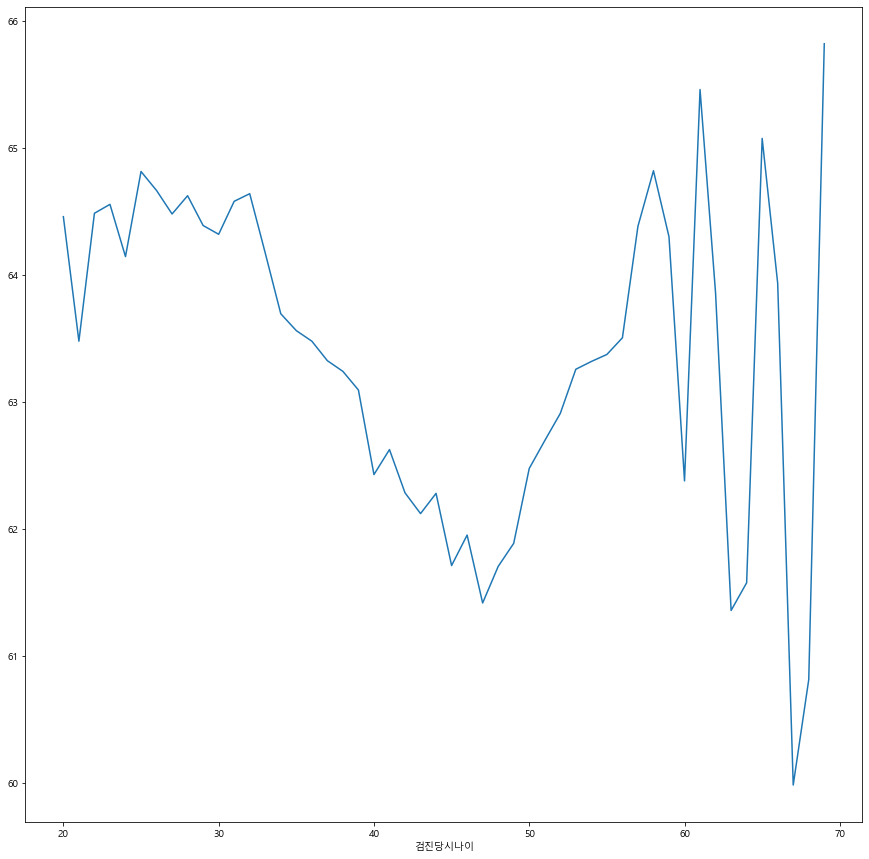

In [1056]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

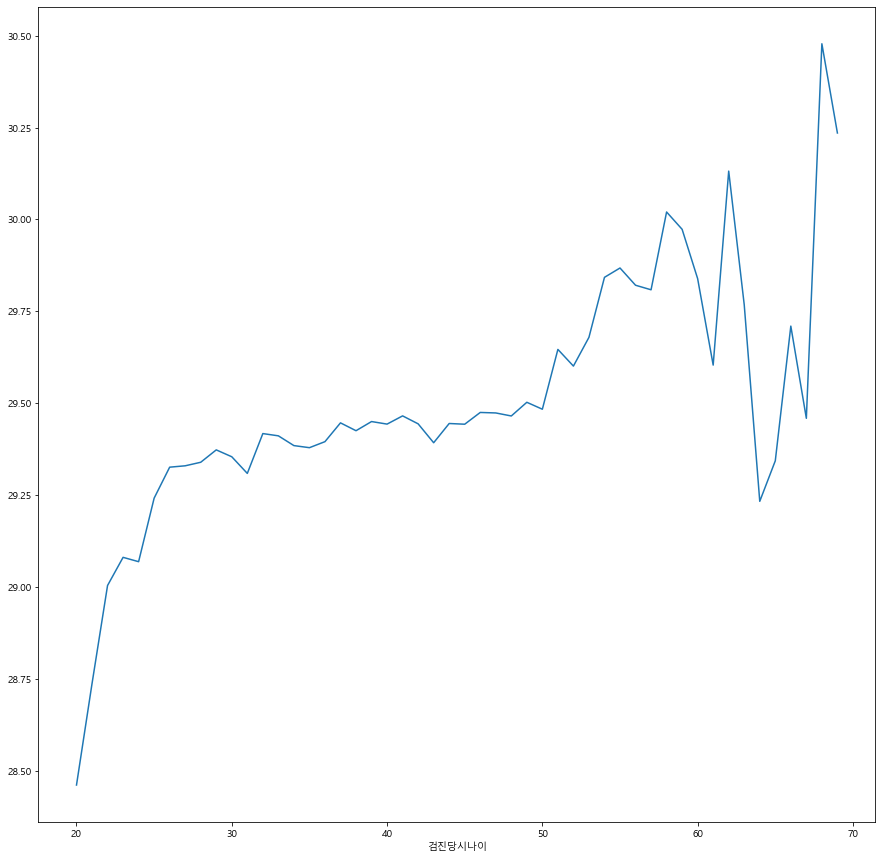

In [1057]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [1058]:
# df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

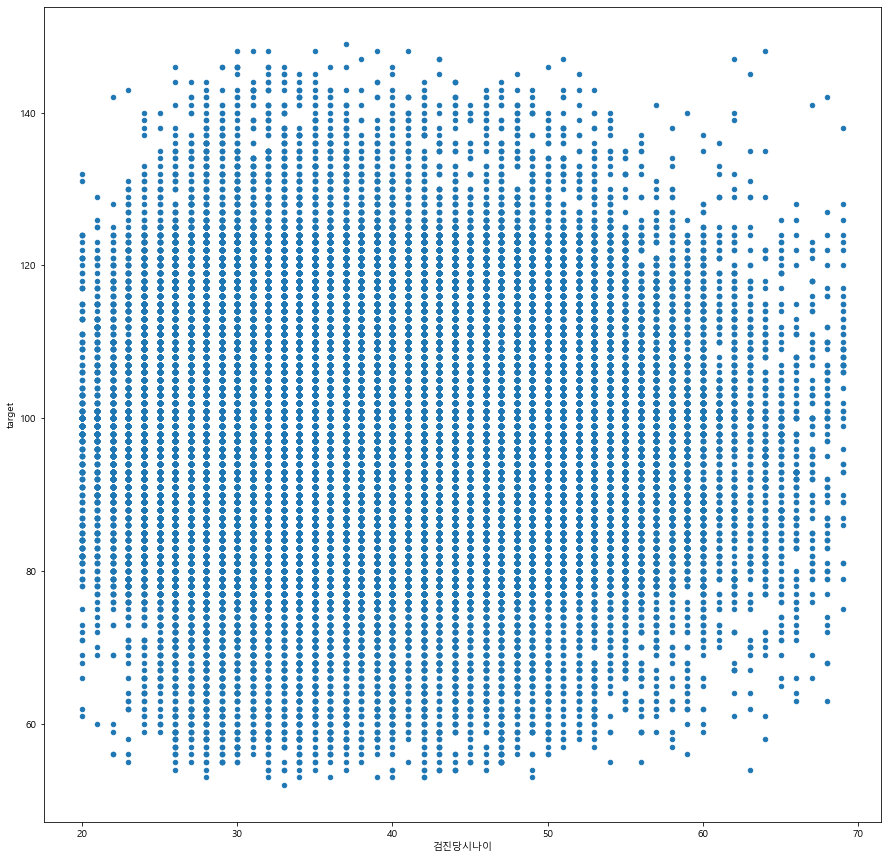

In [1059]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

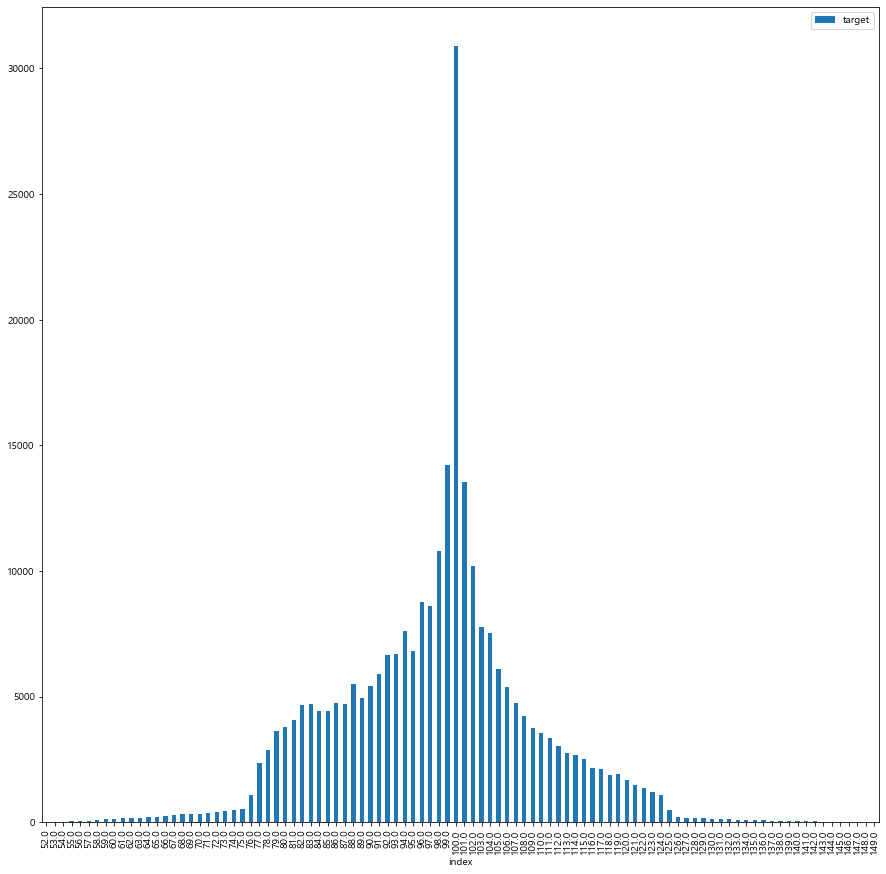

In [1060]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [1061]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
96,52.0,1
93,53.0,9
89,54.0,22
86,55.0,39
80,56.0,56
81,57.0,53
74,58.0,100
70,59.0,144
69,60.0,149
67,61.0,168


In [1062]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [1063]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

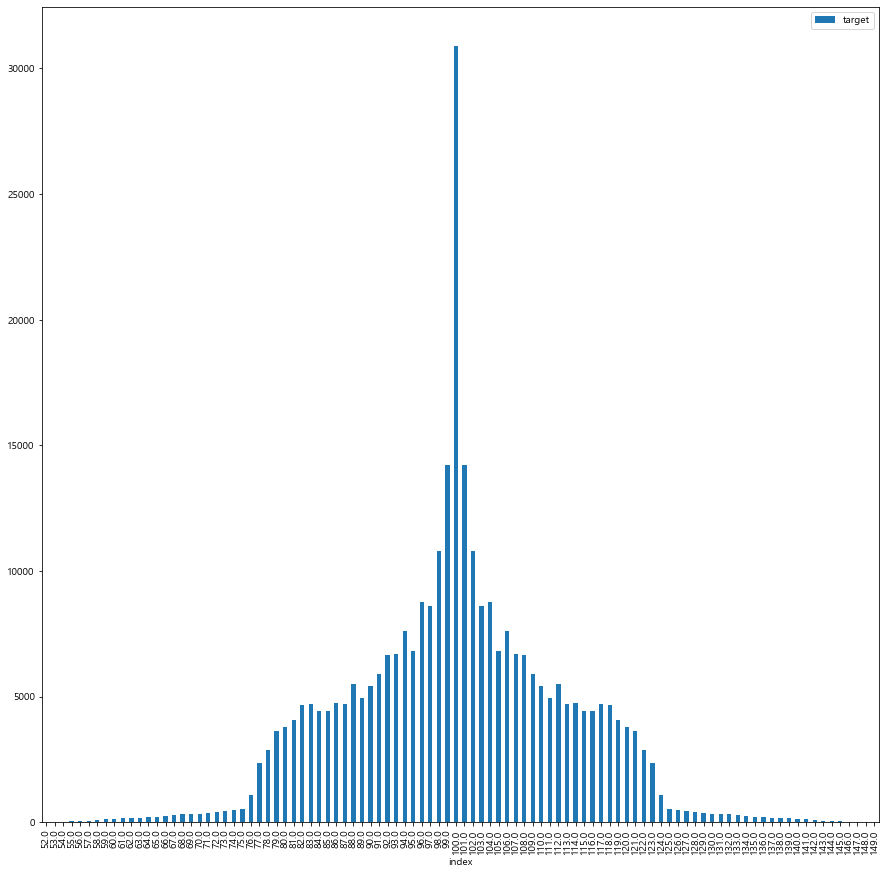

In [1064]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [1065]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
96,52.0,7
94,53.0,9
92,54.0,22
90,55.0,39
86,56.0,56
88,57.0,53
83,58.0,100
81,59.0,144
80,60.0,149
78,61.0,168


# 나이별 확인하기

In [1066]:
# df_woman['검진당시나이'].value_counts()

In [1067]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [1068]:
# df_woman['검진당시나이'].min()

In [1069]:
# df_woman['검진당시나이'].max()

In [1070]:
# df_woman.columns

In [1071]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [1072]:
# df_temp.info()

In [1073]:
# df_temp.reset_index(drop=True, inplace=True)

In [1074]:
# df_woman = df_temp.copy()

In [1075]:
# df_woman['검진당시나이'].value_counts()

In [1076]:
# df_woman[df_woman['검진당시나이']==20]

In [1077]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [1078]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [1079]:
train_columns

['검진당시나이', '아밀라제(Amylase)', '리파아제(Lipase)']

In [1080]:
# target_col = '검진당시나이'

In [1081]:
target_col

'target'

## Min Max Scaling

In [1082]:
from sklearn.preprocessing import MinMaxScaler

In [1083]:
scaling_bool

False

In [1084]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [1085]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [1086]:
# model2 = LinearRegression()

In [1087]:
# model2.fit(X_train2, y_train2)

In [1088]:
# model2.intercept_

In [1089]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [1090]:
model2 = XGBRegressor()

In [1091]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [1092]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [1093]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1012.59 seconds for 10 candidates parameter settings.


In [1094]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [1095]:
# best score
random_search.best_score_

-0.06614860221057896

In [1096]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [1097]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [1098]:
# model = build_model()

In [1099]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [1100]:
# model.summary()

In [1101]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [1102]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [1103]:
# plot_history(history)

## pyTorch 신경망

In [1104]:
np.shape(X_train)[1]

3

In [1105]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [1106]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [1107]:
# epochs = 1000

In [1108]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [1109]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [1110]:
# plt.plot(losses)

## coef 계산

In [1111]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [1112]:
# df_coef2.columns = ['검사항목', 'coef']

In [1113]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [1114]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [1115]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [1116]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [1117]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [1118]:
# slr2 = LinearRegression()

In [1119]:
# slr2.fit(X_train2_poly, y_train2)

In [1120]:
# np.shape(X_train2)

In [1121]:
# np.shape(X_train2_poly)

In [1122]:
# np.shape(X_test2)

In [1123]:
# np.shape(X_test2_poly)

In [1124]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [1125]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [1126]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [1127]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [1128]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [1129]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [1130]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [1131]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.14732470375386325
MSE : 0.06259793712229762
RMSE : 0.25019579757121746


In [1132]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9995856258527934

In [1133]:
model2.score(X_test2, y_test2)

0.9995856258527934

## feature importance

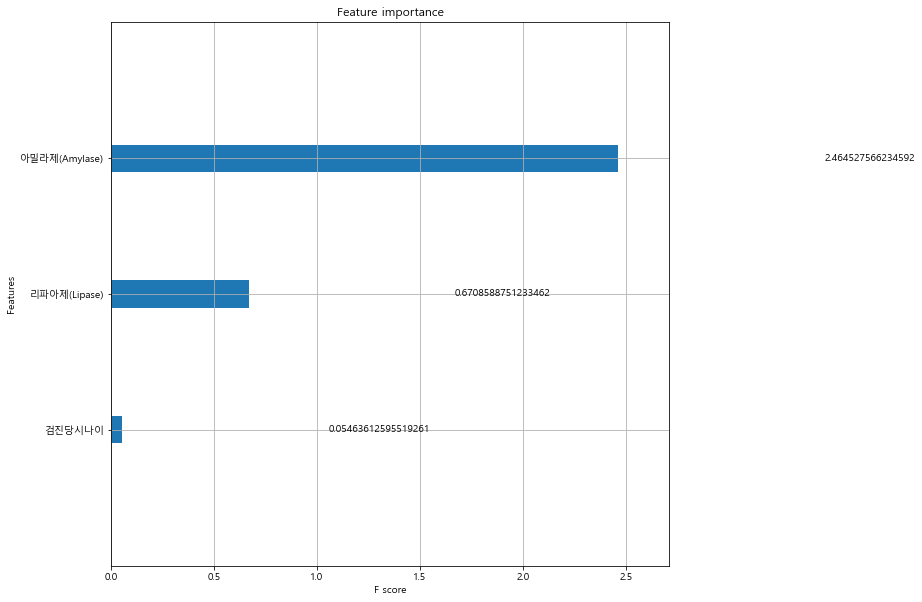

In [1134]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [1135]:
model2.feature_importances_

array([0.01712719, 0.7725737 , 0.21029909], dtype=float32)

In [1136]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [1137]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,아밀라제(Amylase),0.772574
2,리파아제(Lipase),0.210299
0,검진당시나이,0.017127


# 실제나이 - 예측나이 결과

In [1138]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [1139]:
df_test2.head()

,target,0
0,104.0,103.991737
1,92.0,91.935272
2,101.0,101.025711
3,108.0,107.235039
4,100.0,99.976166


In [1140]:
df_test2.columns

Index(['target', 0], dtype='object')

In [1141]:
df_test2.columns = ['실제지수', '예측지수']

In [1142]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [1143]:
df_test2.head()

,실제지수,예측지수,diff
0,104.0,103.991737,-0.008263
1,92.0,91.935272,-0.064728
2,101.0,101.025711,0.025711
3,108.0,107.235039,-0.764961
4,100.0,99.976166,-0.023834


In [1144]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [1145]:
len(df_test2)

79111

In [1146]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,104.0,103.991737,-0.008263,-0.0
1,92.0,91.935272,-0.064728,-0.0
2,101.0,101.025711,0.025711,0.0
3,108.0,107.235039,-0.764961,-1.0
4,100.0,99.976166,-0.023834,-0.0


<AxesSubplot:>

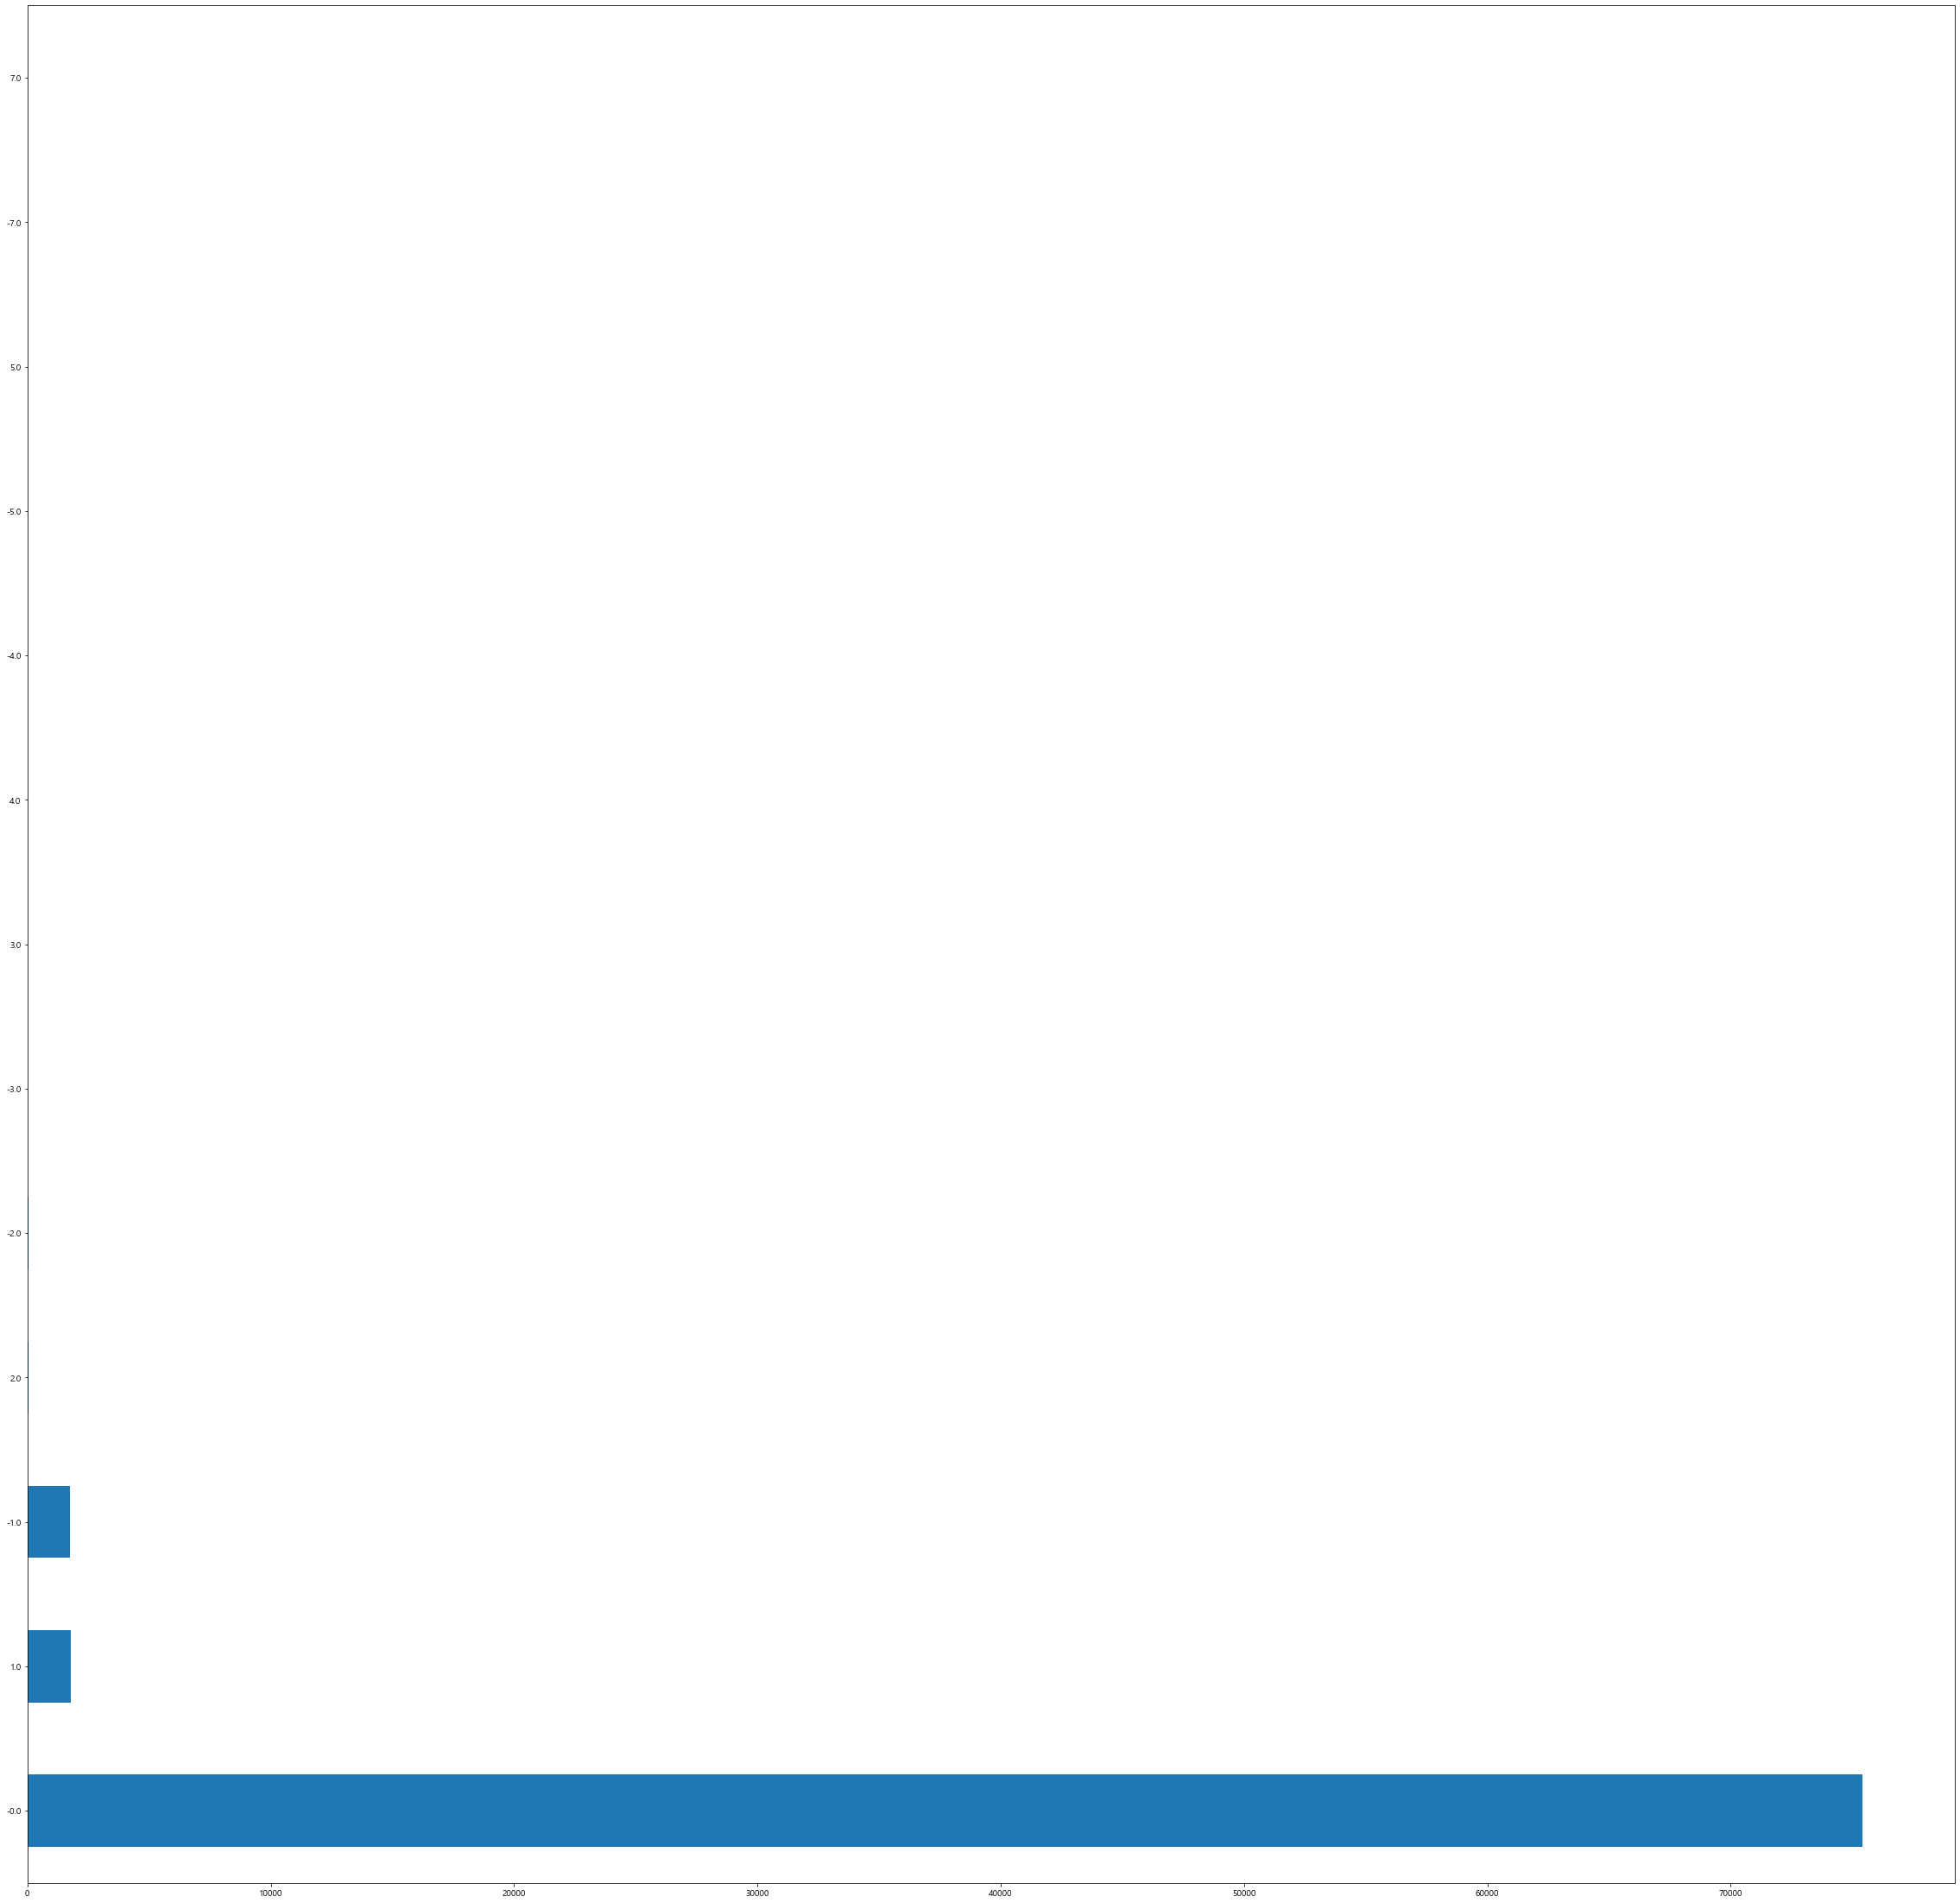

In [1147]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [1148]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [1149]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [1150]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [1151]:
df_train2.round(0).value_counts()

100.0    22983
99.0     10733
101.0    10590
98.0      8067
102.0     8034
96.0      6615
104.0     6582
97.0      6534
103.0     6522
94.0      5821
106.0     5741
105.0     5159
107.0     5080
95.0      5029
108.0     5024
92.0      5020
93.0      4975
91.0      4466
109.0     4459
88.0      4124
110.0     4104
112.0     4022
90.0      4017
111.0     3764
89.0      3635
86.0      3635
113.0     3575
114.0     3556
83.0      3539
117.0     3525
118.0     3505
87.0      3473
82.0      3434
116.0     3347
84.0      3316
85.0      3313
115.0     3309
81.0      3102
119.0     3020
80.0      2857
120.0     2853
121.0     2714
79.0      2691
78.0      2199
122.0     2132
123.0     1802
77.0      1783
76.0       839
124.0      817
125.0      393
75.0       361
127.0      356
74.0       352
126.0      347
73.0       335
72.0       308
128.0      295
129.0      275
71.0       272
70.0       264
130.0      261
68.0       249
131.0      242
69.0       239
132.0      227
133.0      224
67.0      

In [1152]:
y_test2.value_counts()

100.0    7819
101.0    3664
99.0     3582
102.0    2747
98.0     2698
104.0    2167
96.0     2166
103.0    2110
97.0     2109
94.0     1877
106.0    1845
95.0     1729
107.0    1684
93.0     1670
105.0    1666
92.0     1618
108.0    1602
91.0     1447
112.0    1424
109.0    1407
90.0     1397
88.0     1379
110.0    1326
89.0     1322
111.0    1238
87.0     1230
82.0     1194
114.0    1191
83.0     1188
117.0    1175
113.0    1156
118.0    1148
84.0     1121
115.0    1119
116.0    1118
86.0     1116
85.0     1115
119.0    1039
81.0     1000
120.0     966
80.0      939
79.0      933
121.0     918
122.0     755
78.0      723
77.0      570
123.0     553
124.0     278
76.0      263
75.0      155
125.0     148
74.0      131
126.0     117
73.0      109
127.0     105
128.0     102
72.0       94
129.0      88
132.0      87
71.0       81
130.0      81
70.0       80
68.0       77
69.0       74
131.0      69
66.0       61
138.0      61
67.0       61
134.0      55
65.0       55
64.0       53
137.0 

In [1153]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [1154]:
df_plot.columns = ['count']

In [1155]:
df_plot.reset_index(inplace=True)

In [1156]:
df_plot = df_plot.sort_values('index', ascending=True)

In [1157]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

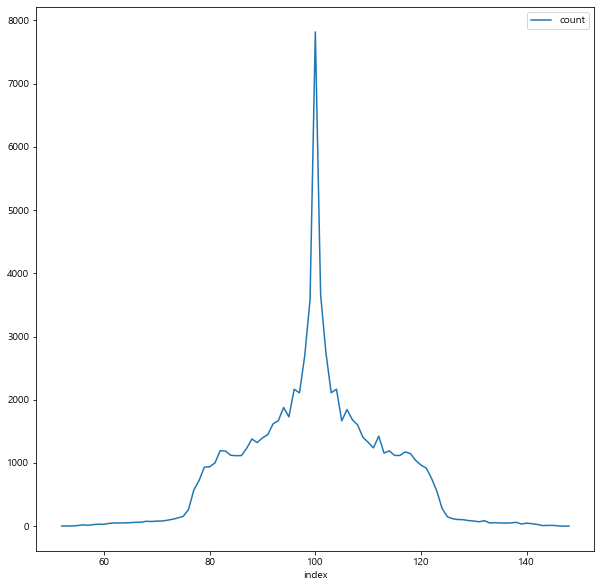

In [1158]:
df_plot.plot()

In [1159]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [1160]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [1161]:
df_test2.round(0).value_counts()

100.0    7721
101.0    3710
99.0     3631
102.0    2742
98.0     2700
96.0     2186
104.0    2137
103.0    2131
97.0     2112
94.0     1938
106.0    1834
107.0    1701
95.0     1687
105.0    1667
93.0     1632
108.0    1608
92.0     1600
91.0     1452
90.0     1416
109.0    1403
112.0    1391
88.0     1389
110.0    1331
89.0     1303
111.0    1249
87.0     1232
114.0    1188
83.0     1188
82.0     1184
113.0    1171
117.0    1167
118.0    1148
116.0    1141
85.0     1128
84.0     1121
115.0    1117
86.0     1099
119.0    1036
81.0     1031
120.0     965
79.0      929
80.0      920
121.0     919
122.0     758
78.0      725
77.0      569
123.0     547
76.0      271
124.0     271
125.0     153
74.0      144
75.0      141
127.0     115
126.0     114
72.0      100
73.0       99
128.0      97
129.0      93
71.0       91
132.0      82
131.0      79
68.0       77
69.0       76
70.0       74
130.0      72
67.0       62
66.0       61
138.0      56
137.0      56
135.0      55
64.0       54
133.0 

In [1162]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [1163]:
df_plot2.columns = ['count']

In [1164]:
df_plot2.reset_index(inplace=True)

In [1165]:
df_plot2

,0,count
0,100.0,7721
1,101.0,3710
2,99.0,3631
3,102.0,2742
4,98.0,2700
5,96.0,2186
6,104.0,2137
7,103.0,2131
8,97.0,2112
9,94.0,1938


In [1166]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [1167]:
df_plot2.set_index(0, inplace=True)

In [1168]:
df_plot2

,count
0,
52.0,2
53.0,1
54.0,3
55.0,11
56.0,19
57.0,17
58.0,26
59.0,26
60.0,28


<AxesSubplot:xlabel='0'>

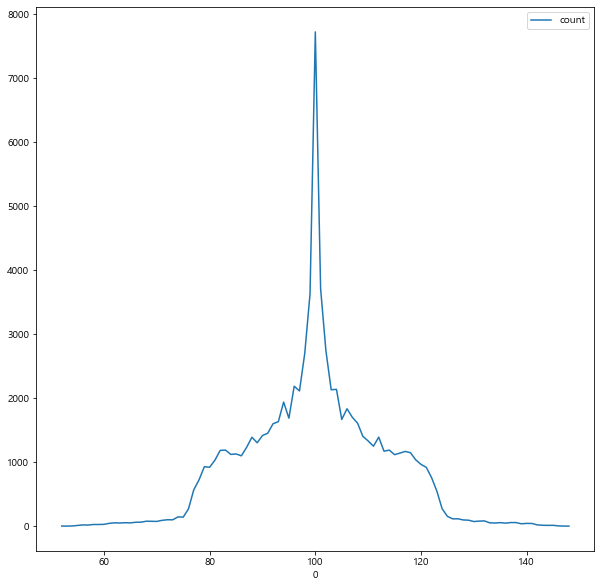

In [1169]:
df_plot2.plot()

# 시각화

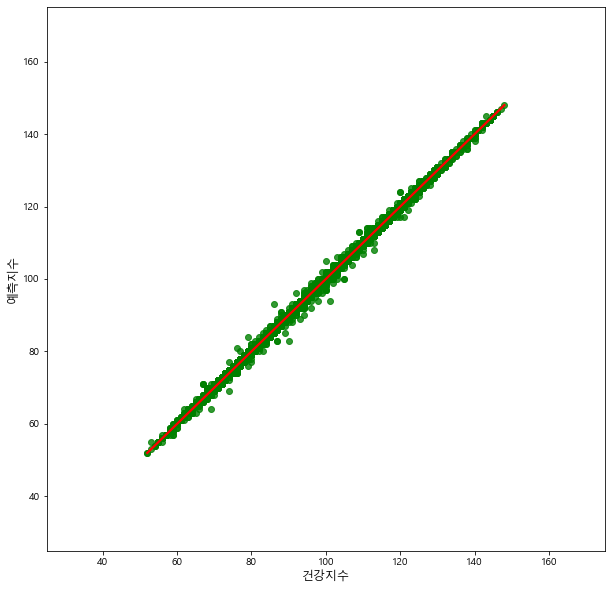

In [1170]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [1171]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
0,2021,53,2632765,2,26,47.0,13.00,120.52,186.03,153.28,127.0
1,2024,53,2658222,2,29,50.0,29.43,120.20,100.00,110.10,105.0
2,2020,54,497669,2,30,39.0,29.43,160.33,100.00,130.16,115.0
3,2022,54,1319859,2,32,56.0,29.43,99.25,100.00,99.62,100.0
4,2023,54,2039511,2,33,71.0,29.43,76.34,100.00,88.17,94.0


In [1172]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272060 entries, 0 to 272059
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               272060 non-null  int64  
 1   UID                272060 non-null  int64  
 2   CU_REC_ID          272060 non-null  int64  
 3   SEX                272060 non-null  int64  
 4   검진당시나이             272060 non-null  int64  
 5   아밀라제(Amylase)      272060 non-null  float64
 6   리파아제(Lipase)       272060 non-null  float64
 7   아밀라제(Amylase)_kde  272060 non-null  float64
 8   리파아제(Lipase)_kde   272060 non-null  float64
 9   kde_mean           272060 non-null  float64
 10  target             272060 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 22.8 MB


In [1173]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target
58753,2022,196909,2495702,2,29,94.0,24.0,28.78,107.65,68.22,84.0
58754,2024,196909,2495697,2,31,92.0,32.0,31.91,84.24,58.08,79.0


In [1174]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [1175]:
len(df_pred2)

272060

In [1176]:
df_pred2.reset_index(drop=True, inplace=True)

In [1177]:
X_test2

,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
107023,54,51.0,29.43
109685,36,74.0,29.43
74711,30,59.0,29.43
198188,34,42.0,32.00
156246,50,53.0,29.43
...,...,...,...
219284,34,36.0,29.43
167031,46,46.0,29.43
212712,32,98.0,29.43
107784,48,76.0,29.43


In [1178]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '아밀라제(Amylase)',
       '리파아제(Lipase)', '아밀라제(Amylase)_kde', '리파아제(Lipase)_kde', 'kde_mean',
       'target'],
      dtype='object')

In [1179]:
df_pred2[train_columns]

,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,26,47.0,13.00
1,29,50.0,29.43
2,30,39.0,29.43
3,32,56.0,29.43
4,33,71.0,29.43
...,...,...,...
272055,36,65.0,34.00
272056,47,70.0,19.00
272057,57,45.0,38.00
272058,35,68.0,41.00


In [1180]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [1181]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [1182]:
pred_data2

array([126.92187 , 105.01496 , 115.05047 , ...,  98.09207 ,  80.980774,
        81.3434  ], dtype=float32)

In [1183]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1184]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [1185]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,47.0,13.00,120.52,186.03,153.28,127.0,126.921867
1,2024,53,2658222,2,29,50.0,29.43,120.20,100.00,110.10,105.0,105.014961
2,2020,54,497669,2,30,39.0,29.43,160.33,100.00,130.16,115.0,115.050468
3,2022,54,1319859,2,32,56.0,29.43,99.25,100.00,99.62,100.0,100.048561
4,2023,54,2039511,2,33,71.0,29.43,76.34,100.00,88.17,94.0,93.912201
5,2024,54,2750990,2,34,41.0,29.43,157.20,100.00,128.60,114.0,113.944839
6,2022,56,1351361,2,33,56.0,29.43,101.71,100.00,100.86,100.0,100.110268
7,2023,56,2032999,2,34,54.0,29.43,101.49,100.00,100.74,100.0,100.032867
8,2021,59,701026,2,29,96.0,29.43,25.94,100.00,62.97,81.0,81.121376
9,2022,59,1376992,2,30,66.0,29.43,98.83,100.00,99.42,100.0,99.985321


## 예측지수 성능평가

In [1186]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.14849411433631513

# target으로 나이 계산

In [1187]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [1188]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,47.00,13.00,120.52,186.03,153.28,127.0,126.921867,20.62
1,2024,53,2658222,2,29,50.00,29.43,120.20,100.00,110.10,105.0,105.014961,28.00
2,2020,54,497669,2,30,39.00,29.43,160.33,100.00,130.16,115.0,115.050468,26.99
3,2022,54,1319859,2,32,56.00,29.43,99.25,100.00,99.62,100.0,100.048561,31.99
4,2023,54,2039511,2,33,71.00,29.43,76.34,100.00,88.17,94.0,93.912201,34.22
5,2024,54,2750990,2,34,41.00,29.43,157.20,100.00,128.60,114.0,113.944839,31.21
6,2022,56,1351361,2,33,56.00,29.43,101.71,100.00,100.86,100.0,100.110268,32.98
7,2023,56,2032999,2,34,54.00,29.43,101.49,100.00,100.74,100.0,100.032867,33.99
8,2021,59,701026,2,29,96.00,29.43,25.94,100.00,62.97,81.0,81.121376,32.78
9,2022,59,1376992,2,30,66.00,29.43,98.83,100.00,99.42,100.0,99.985321,30.00


## 예측나이 성능평가

In [1189]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.696210321252665

# 최종 산출

In [1190]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),아밀라제(Amylase)_kde,리파아제(Lipase)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,47.0,13.00,120.52,186.03,153.28,127.0,126.921867,20.62
1,2024,53,2658222,2,29,50.0,29.43,120.20,100.00,110.10,105.0,105.014961,28.00
2,2020,54,497669,2,30,39.0,29.43,160.33,100.00,130.16,115.0,115.050468,26.99
3,2022,54,1319859,2,32,56.0,29.43,99.25,100.00,99.62,100.0,100.048561,31.99
4,2023,54,2039511,2,33,71.0,29.43,76.34,100.00,88.17,94.0,93.912201,34.22


# DataMart csv

In [1191]:
df_copy = df.copy()

In [1192]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
0,2010,7282,2520,1,42,NaN,NaN
1,2010,7490,3638,1,39,71.0,NaN
2,2010,7915,3997,1,36,55.0,NaN
3,2010,8056,4745,1,42,32.0,NaN
4,2010,8457,3929,1,38,47.0,NaN


In [1193]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   아밀라제(Amylase)  853333 non-null   float64
 6   리파아제(Lipase)   205287 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 64.8 MB


In [1194]:
minimums

[11.5, 3.5]

In [1195]:
maximums

[111.5, 55.5]

In [1196]:
train_columns

['검진당시나이', '아밀라제(Amylase)', '리파아제(Lipase)']

In [1197]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [1198]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [1199]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [1200]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
10,2010,15894,2533,2,29,72.0,NaN
22,2010,42223,1364,2,24,103.0,NaN
37,2011,364096,6645,2,32,111.5,NaN
45,2010,120518,3595,2,30,45.0,NaN
63,2011,698706,6600,2,36,NaN,NaN


## 스크리닝

### 아밀라제 스크리닝

In [1201]:
screening = 100

In [1202]:
scr_col = '아밀라제(Amylase)'

In [1203]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
10,2010,15894,2533,2,29,72.0,NaN
45,2010,120518,3595,2,30,45.0,NaN
87,2010,167053,3087,2,26,89.0,NaN
245,2019,7687,1867229,2,42,43.0,NaN
246,2019,8011,1900641,2,34,44.0,NaN


In [1204]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

298842

In [1205]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [1206]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
10,2010,15894,2533,2,29,72.0,NaN
45,2010,120518,3595,2,30,45.0,NaN
87,2010,167053,3087,2,26,89.0,NaN
245,2019,7687,1867229,2,42,43.0,NaN
246,2019,8011,1900641,2,34,44.0,NaN


In [1207]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

298842

### 리파아제 스크리닝

In [1208]:
screening = 60

In [1209]:
scr_col = '리파아제(Lipase)'

In [1210]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
314,2019,9331,741984,2,24,48.0,17.1
331,2010,276452,2994,2,27,67.0,44.0
359,2010,315847,230,2,23,71.0,41.0
923,2010,698842,2111,2,35,63.0,45.0
941,2010,710490,213,2,28,39.0,24.0


In [1211]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

77324

In [1212]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [1213]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase)
314,2019,9331,741984,2,24,48.0,17.1
331,2010,276452,2994,2,27,67.0,44.0
359,2010,315847,230,2,23,71.0,41.0
923,2010,698842,2111,2,35,63.0,45.0
941,2010,710490,213,2,28,39.0,24.0


In [1214]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

77324

## 검진 항목 all 결측치 지우기

In [1215]:
target_cols

['아밀라제(Amylase)', '리파아제(Lipase)']

In [1216]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [1217]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [1218]:
len(df_woman_csv)

329548

## fillna

In [1219]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '아밀라제(Amylase)',
       '리파아제(Lipase)', '아밀라제(Amylase)_kde', '리파아제(Lipase)_kde', 'kde_mean',
       'target'],
      dtype='object')

In [1220]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '아밀라제(Amylase)',
       '리파아제(Lipase)'],
      dtype='object')

In [1221]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 모델 예측

In [1222]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [1223]:
pred_data2 = pred_data2.round(0)

In [1224]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1225]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수
0,2010,15894,2533,2,29,72.0,29.43,96.0
1,2010,42223,1364,2,24,103.0,29.43,80.0
2,2011,364096,6645,2,32,111.5,29.43,77.0
3,2010,120518,3595,2,30,45.0,29.43,108.0
4,2010,167053,3087,2,26,89.0,29.43,83.0


### 성능 평가

In [1226]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [1227]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [1228]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [1229]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.8494750385376328


In [1230]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9114481682565919

In [1231]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
0,2010,15894,2533,2,29,72.0,29.43,96.0,29.8
1,2010,42223,1364,2,24,103.0,29.43,80.0,28.0
2,2011,364096,6645,2,32,111.5,29.43,77.0,36.6
3,2010,120518,3595,2,30,45.0,29.43,108.0,28.4
4,2010,167053,3087,2,26,89.0,29.43,83.0,29.4


In [1232]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329548 entries, 0 to 329547
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           329548 non-null  int64  
 1   UID            329548 non-null  int64  
 2   CU_REC_ID      329548 non-null  int64  
 3   SEX            329548 non-null  int64  
 4   검진당시나이         329548 non-null  int64  
 5   아밀라제(Amylase)  329548 non-null  float64
 6   리파아제(Lipase)   329548 non-null  float64
 7   예측지수           329548 non-null  float32
 8   예측나이           329548 non-null  float64
dtypes: float32(1), float64(3), int64(5)
memory usage: 21.4 MB


# 최종 UID별 확인

In [1233]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
86675,2021,261581,806568,2,50,85.0,29.0,85.0,53.0
86681,2021,261581,2243879,2,50,85.0,29.0,85.0,53.0
86682,2021,261581,2418909,2,50,85.0,29.0,85.0,53.0
86683,2021,261581,2418910,2,50,85.0,29.0,85.0,53.0
133803,2022,261581,751339,2,51,63.0,36.0,93.0,52.4
133806,2022,261581,2243878,2,51,63.0,36.0,93.0,52.4
203173,2023,261581,1519764,2,52,46.0,18.0,115.0,49.0
203174,2023,261581,2243877,2,52,46.0,18.0,115.0,49.0
300790,2024,261581,2418911,2,53,61.0,29.0,100.0,53.0


In [1234]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
42930,2022,477944,956268,2,31,67.0,30.0,97.0,31.6
156541,2022,477944,2212776,2,31,67.0,30.0,97.0,31.6
239769,2023,477944,1454346,2,32,59.0,29.0,94.0,33.2
239770,2023,477944,2212775,2,32,59.0,29.0,94.0,33.2
310940,2024,477944,2362855,2,33,53.0,23.0,103.0,32.4


In [1235]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,아밀라제(Amylase),리파아제(Lipase),예측지수,예측나이
260948,2023,896916,1459636,2,28,61.0,31.0,95.0,29.0
260938,2023,896916,1842092,2,28,61.0,31.0,95.0,29.0
260949,2023,896916,2031853,2,28,61.0,31.0,95.0,29.0
260950,2023,896916,2253054,2,28,61.0,31.0,95.0,29.0
256228,2023,896916,2257188,2,28,61.0,31.0,95.0,29.0
320060,2024,896916,2253058,2,29,66.0,33.0,93.0,30.4


# 최종 CSV 병합 Extract

In [1236]:
len(df_man_csv)

552203

In [1237]:
len(df_woman_csv)

329548

In [1238]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [1239]:
df_csv.to_csv(csv_path)